# Lab 2 - Classification
### Yang Zhang, Reannan McDaniel, Jonathon Roach, Fred Poon
### 7/3/2020
### MSDS_7331

# Table of contents
1. [Business Understanding](#business-understanding)
2. [Data Understanding](#data-understanding)
3. [Data Preparation - The Variables](#data-prep-1)
    1. [Classification](#data-prep-class)
    2. [Regression](#data-prep-reg)
4. [Data Preparation - The Dataset](#data-prep-2)
5. [Models and Evaluations](#model-evaluation)
    1. [Model and Evaluation 1 - the metrics](#model-evaluation-1)
    2. [Model and Evaluation 2 - the methods](#model-evaluation-2)
    3. [Model and Evaluation 3 - the models](#model-evaluation-3)
        1. [Regression](#regression)
        2. [Classification](#classificastion)
    4. [Model and Evaluation 4 - the analyses](#model-evaluation-4)
    5. [Model and Evaluation 5 - the confidence interval](#model-evaluation-5)
    6. [Model and Evaluation 6 - the features](#model-evaluation-6)
6. [Deployment](#deployment)
7. [Exceptional Work](#exceptional-work)

## Business Understanding <a name="business-understanding"></a>
For this analysis, our group will be working with North Carolina Public Schools Report Card and Statistical Profiles Data sets from the years 2014 to 2017. These data sets encompass information across 4 continuous years of educational attributes in North Carolina, USA.  The data is collected from the State of North Carolina at [https://www.dpi.nc.gov/](https://www.dpi.nc.gov/) and made available from the Belk Endowment Educational Attainment Data Repository for North Carolina Public Schools by Dr. Jake Drew. Among other reasons, the data was collected for evaluation of public-school performance for the purpose of efficiently allocating funds to various educational initiatives. Analyses of such data are important because high-impact educational initiatives that are well-funded contribute to increased graduation rates, increased achievement at the post-secondary level, less crime, and greater economic engagement among young people. For the purpose of this exercise, our focus is on predicting graduation rates using various school characteristics, such as type of school (elementary, middle, high, or some combination of the three), social demographics, economic demographics, and location between 2014 and 2017. The Belk Foundation's website says, "Our goal is to empower today’s workforce by creating pathways to and through postsecondary education for underrepresented students".

For the sake of this analysis, we assume that better performing schools have better outcomes in postsecondary education. With North Carolina's rapidly changing demographics, it is important to take into consideration schools' unique needs when allocating funds to strategic investment initiatives. Here, we explore where funding can be best applied based on educational achievement data.

We will explore through visual and mathematical modeling which features best predict the graduation rate. The analysis will come in a combination of classification models to predict. In this analysis we will observe:

- What classification model provides the higher accuracy score?
- What regression model provides a better MAE score?

## Data Understanding <a name="data-understanding"></a>

## Data Preparation 1 - The Variables <a name="data-prep-1"></a>
Two separate tasks are performed for the education dataset: The first is a classification task for SPG Grade, the second is a regression task for graduation rate. Because the target variables are different, different scopes/subsets of data are used for these tasks. Below we are introducting the data preparation stages of the two tasks separately.

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# For multiple line outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Data Preparation for Classification Task <a name="data-prep-class"></a>
Within the 259 variables in the The North Carolina Education dataset, we are interested in understanding how School Performance Grade or SPG Grade is calculated and what attributes have the most effect on the classification. It is important to understand what SPG Grade is and how it is calculated. SPG Grade is a letter grade of “A”-“F” that is comprised of SPG Score, a number grade of 0-100. The scoring is rubric is “A” = SPG Score of 85-100, “B” = 70-84, “C” = 55-69, “D” = 40-54, “F” = < 40. We also need to explain how SPG Score is generated. The school achievement score makes 80% of the SPG Score and it measures EOG (End of Grade)Reading and Math for grades 3-8, EOC (Education Outreach Committee) science, biology, math and english and ACT scores and Graduation Rates. EVAAS (Education Value-Added Assessment System) Growth Score makes up the remaining 20% of the SPG Score. This attribute includes education value added assessment system and composite index of growth. When evaluating SPG Grade, it is important to remove or make note of these variables in the list of dependent variables in the model due to the correlation will be skewed.

#### Data Preparation Workflow
- Data Merge
- One Hot-encoding
- Feature Selection
- Data Balancing

#### Data Merge
We combined dataset of all public schools in north Carolina from year 2014-2017 together. We also add a variable "Year" to note the calendar year the data come from.

In [2]:
# read in CSV
df2014 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2014_MLnew.csv')
df2015 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2015_MLnew.csv')
df2016 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2016_MLnew.csv')
df2017 = pd.read_csv('https://raw.githubusercontent.com/fredpoon/ds_7331_jyrf_eda/master/Data_Prep/PublicSchools2017_MLnew.csv')

df2014.shape
df2015.shape
df2016.shape
df2017.shape


df2014['Year'] = 2014
df2015['Year'] = 2015 
df2016['Year'] = 2016 
df2017['Year'] = 2017 

frames = [df2014, df2015, df2016, df2017]
df_comb_test = pd.concat(frames,join='inner', ignore_index=True)

df_comb_test['Year']

(2426, 318)

(2432, 335)

(2430, 328)

(2443, 328)

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
9726    2017
9727    2017
9728    2017
9729    2017
9730    2017
Name: Year, Length: 9731, dtype: int64

#### One Hot-encoding

A one-hot encoding procedure has been conducted to convert all of them into continuous variables. The procedure is shown below: 8 variables with more than 25 unique values are deleted. 38 new variables has been generated from one hot-encoding of categorical variables.

In [3]:
schoolData = df_comb_test

#Locate the categorical variables in dataset
sD_nominal = schoolData.loc[:, (schoolData.dtypes == object)]
uniqueThreshold = 25

#Delete categorical columns with > 25 unique values (Each unique value becomes a column during one-hot encoding)
oneHotUniqueValueCounts = schoolData[sD_nominal.columns].apply(lambda x: x.nunique())
oneHotUniqueValueCols = oneHotUniqueValueCounts[oneHotUniqueValueCounts >= uniqueThreshold].index
schoolData.drop(oneHotUniqueValueCols, axis=1, inplace=True) 

#Review dataset contents one hot high unique value drops
print('*********After: Removing columns with >= uniqueThreshold unique values***********')
schoolData.info(verbose=False)
print ('\r\nColumns Deleted: ', len(oneHotUniqueValueCols))

*********After: Removing columns with >= uniqueThreshold unique values***********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Columns: 250 entries, szip_ad to Year
dtypes: float64(237), int64(2), object(11)
memory usage: 18.6+ MB

Columns Deleted:  9


"SPG Grade" is our response variable and "SPG Score" is the continous expression of it. "SPG Score" is a composite score calculated from schools' average scores based on multiple assessments. The "SPG Grade" is converted from "SPG Score" by ranges. We have to remove them from the original dataset.

Per the analysis, we found that a few attributes were directly used to calculate our response variable. With this in mind, we'll remove these attributes from the dataset.  Features which are discarded include end-of-course, end-of-grade scores and any features related to EVAAS growth metrics. For example: EOG_XXX, EOC_XXX.

After removing them, we display the information of the variables to make sure we don't have them in the dataset anymore. We end up with 148 features in total.

In [4]:
#Keep an original copy of the Data
schoolData_org = schoolData

#Pop out the SPG information from the Data
schoolData_SPG = schoolData.pop('SPG Grade')
schoolData_SPGScore = schoolData.pop('SPG Score')

# Remove All the Columns that directly used to calculate SPG Grade and Score
schoolData.drop(schoolData.iloc[:, 21:162], inplace=True, axis=1)
schoolData.info(verbose=True)

#Isolate remaining categorical variables
begColumnCt = len(schoolData.columns)

#one hot encode categorical variables
schoolData = pd.get_dummies(data=schoolData,drop_first=True)

#Determine change in column count
endColumnCt = len(schoolData.columns)
columnsAdded = endColumnCt - begColumnCt

#Review dataset contents one hot high unique value drops
print('Columns To One-Hot Encode: ', len(sD_nominal.columns))
print('\r\n*********After: Adding New Columns Via One-Hot Encoding*************************')
schoolData.info(verbose=False)
print ('\r\nNew Columns Created Via One-Hot Encoding: ', columnsAdded)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9731 entries, 0 to 9730
Data columns (total 107 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   szip_ad                              float64
 1   category_cd                          object 
 2   calendar_type_txt                    object 
 3   sna_pgm_type_cd                      object 
 4   school_type_txt                      object 
 5   calendar_only_txt                    object 
 6   title1_type_cd                       object 
 7   esea_status                          object 
 8   student_num                          float64
 9   lea_avg_student_num                  float64
 10  st_avg_student_num                   float64
 11  Grad_project_status                  object 
 12  Math I_Size                          float64
 13  lea_total_expense_num                float64
 14  lea_salary_expense_pct               float64
 15  lea_services_expense_pct             

#### Feature Selection

We original have 148 features in the data table. We don't want to include this many features for model feasibility. However, as we have a data size requirement, and we also want the constructing model to be high quality. We decide to conduct a feature selection process to choose the most important features to use.

There are many ways to conduct feature selection. In this project we use random forest and plot out feature importances of all features. Note that the work below is not for feasible model construction (we didn't split train/test) but just for picking out the most important variables to use.  

In [6]:
# Random Forest apply to X with all variables
from sklearn.ensemble import RandomForestClassifier
clfa=RandomForestClassifier(n_estimators=100)
clfa.fit(schoolData,schoolData_SPG)
y_pred=clfa.predict(schoolData)

#For feature importance from RandomForestClassifier()
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(clfa, random_state=1).fit(schoolData,schoolData_SPG)
eli5.show_weights(perm, feature_names = schoolData.columns.tolist(), top=50)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Weight,Feature
0.0282 ± 0.0025,TotalTargets_pTarget_PctMet
0.0060 ± 0.0005,MinorityMalePct
0.0031 ± 0.0005,AsianFemalePct
0.0028 ± 0.0006,MinorityFemalePct
0.0020 ± 0.0011,short_susp_per_c_num
0.0012 ± 0.0007,title1_type_cd_Y
0.0007 ± 0.0004,BlackMalePct
0.0005 ± 0.0002,BlackFemalePct
0.0005 ± 0.0002,avg_daily_attend_pct
0.0005 ± 0.0004,MathGr3-8_pTarget_PctMet


To meet the data size requirement, we need to have as least 450,000/9371 = 48 attributes to use for the data. Above, we used RandomForestClassifer for the purpose of feature selection and each feature importance to identify which attributes to keep and/or remove from our dataset.

To satisfy this we pick the first 50 attributes to use. Notice that in the below attributes list there are both continuous attributes and the categorical attributes after one-hot encoding. 

In [5]:
#Pick and Choose variables
schoolData_pick = schoolData[[
'TotalTargets_pTarget_PctMet',
'MinorityMalePct',
'MinorityFemalePct',
'short_susp_per_c_num',
'avg_daily_attend_pct',
'title1_type_cd_Y',
'BlackMalePct',
'AsianFemalePct',
'BlackFemalePct',
'HispanicMalePct',
'MathGr3-8_pTarget_PctMet',
'AsianMalePct',
'SciGr5&8_pTarget_PctMet',
'nbpts_num',
'lea_sat_avg_score_num',
'stud_internet_comp_num',
'st_avg_student_num',
'HispanicFemalePct',
'Accomplished_TCHR_Standard 4_Pct',
'Accomplished_TCHR_Standard 3_Pct',
'Developing_TCHR_Standard 2_Pct',
'Accomplished_TCHR_Standard 5_Pct',
'10+ Years_LEA_Exp_Pct_Prin',
'4-10 Years_LEA_Exp_Pct_Prin',
'Accomplished_TCHR_Standard 1_Pct',
'Accomplished_TCHR_Standard 2_Pct',
'Developing_TCHR_Standard 1_Pct',
'pct_GCE_ALL',
'0-3 Years_LEA_Exp_Pct_Prin',
'st_emer_prov_teach_pct',
'lea_sat_participation_pct',
'lea_ap_participation_pct',
'lea_federal_perpupil_num',
'lea_local_perpupil_num',
'advance_dgr_pct',
'Developing_TCHR_Standard 5_Pct',
'lateral_teach_pct',
'lea_flicensed_teach_pct',
'Developing_TCHR_Standard 3_Pct',
'lea_tchyrs_0thru3_pct',
'lea_tchyrs_11plus_pct',
'lea_nbpts_num',
'lea_advance_dgr_pct',
'lea_1yr_tchr_trnovr_pct',
'lea_emer_prov_teach_pct',
'st_flicensed_teach_pct',
'st_tchyrs_0thru3_pct',
'st_1yr_tchr_trnovr_pct',
'lea_tchyrs_4thru10_pct',
'Category_Cd_T',
]]

# Dataset Dimension with picked variables
schoolData_pick.shape

(9731, 50)

#### Data Balancing
If the data is not balanced or as a skewed distribution with in the training set then the accuracy will not produce a reliable result. Sometimes imbalance occurs if the dataset is too small and further reduced in the training set.

Before identifying the data balancing need, we first conducted a simplied procedure to our response variable (SPG_Grade). We investigate the current class of the SPG Grade and found that the class "A" and "A+NG" are identical so we merge the two.Notice that magnet schools in 2016-2017 are not required to report SPG score. Those schools with incomplete information are marked "I". the class "I" are removed from the dataset.

The grade C is dominate the dataset with the largest propertion, followed by B or D. A and F are just a small propertion of the whole dataset. 

,0
count,9216
unique,5
top,C
freq,3973


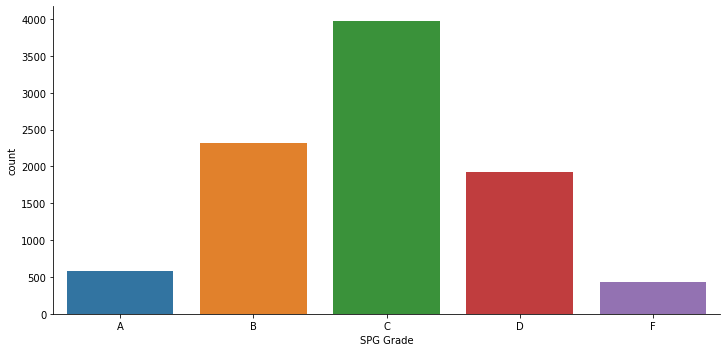

In [6]:
schoolData_SPG_org = schoolData_SPG
schoolData_SPG = schoolData_SPG_org

import numpy as np
schoolData_SPG= np.select(
    [
        schoolData_SPG == 'A', 
        schoolData_SPG == 'B',
        schoolData_SPG == 'C',
        schoolData_SPG == 'D',
        schoolData_SPG == 'F',
        schoolData_SPG == 'A+NG',
        schoolData_SPG == 'I'
    ], 
    [
        'A', 
        'B',
        'C',
        'D',
        'F',
        'A',
        'NA'
    ],
    default='NA'
)

#Filter out the sample with "NA" on SPG Grade
schoolData_SPG_new = schoolData_SPG[schoolData_SPG!='NA']
schoolData_pick_new = schoolData_pick[schoolData_SPG!='NA']

# Check if the levels of SPG Grade has been altered
s = pd.DataFrame(schoolData_SPG_new)
s.describe()

#Factor Plot for SPG Grade
s.columns=['SPG Grade']
                        
sns.factorplot("SPG Grade", data=s, aspect=2,
                       kind="count", order=['A','B','C','D','F'])

plt.show()

To solve this problem, we are using the crieteria below. We conduct 3 seperate procedures: UnderSample all cases, UnderSample majority class, SMOTE Oversample.

They produce 3 seperate sets of X and y from the original dataset. Those sets will be evaluate against each other and we will decide the best data balancing strategy to use.

In [7]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample the dataset using the RandomUnderSampler 
# Set all class sizes equal to the smallest class.
us = RandomUnderSampler()
X_us, y_us = us.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

# Undersample the dataset using the RandomUnderSampler 
# Undersample the majority class only
us = RandomUnderSampler(sampling_strategy='majority')
X_us_maj, y_us_maj = us.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

from imblearn.over_sampling import SMOTE

# Oversample using SMOTE
# Make all classes the same size as the majority class.
# WARNING - This can exponentially increase the size of the input dataset.
sm = SMOTE(sampling_strategy='not majority')
X_sm, y_sm = sm.fit_sample(schoolData_pick_new, pd.DataFrame(schoolData_SPG_new))

By comparing the results for the 3 different methods dealing with data imbalance, we run random forest with the datasets we generated. Accuracy are measured with the results of the variables. As shown the SMOTE strategy get the highest accuracy which is 20%+ than the undersample strategy. Due to the effectiveness of the SMOTE strategy, the dataset has been chosen for creating models in the next session, we also conduct modeling on the original data for benchmarking. 

In [155]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
#Training using Undersample Method1     

X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.2, random_state=42)

clfus=RandomForestClassifier(n_estimators=100)
clfus.fit(X_train,y_train)
y_pred_us=clfus.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_us))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.6697674418604651


In [157]:
#Training using Undersample Method2

X_train, X_test, y_train, y_test = train_test_split(X_us_maj, y_us_maj, test_size=0.2, random_state=42)
    
clfusm=RandomForestClassifier(n_estimators=100)
clfusm.fit(X_train,y_train)
y_pred_usm=clfusm.predict(X_test)
    
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_usm))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.7841409691629956


In [9]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
#Training using Oversample Method

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

clfsm=RandomForestClassifier(n_estimators=100)
clfsm.fit(X_train,y_train)
y_pred_sm=clfsm.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sm))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.8754090108230557


#### Data Scaling and Dimension Reduction

By applying standard scalers to the dataset, we transformed the original features to the ranges between -1 and 1. An important usage of the scaled varaibles is for feature importance.

A simple test of random forest has been conducted using random forest to see any impact to model accuracy. The resulted accuracy (0.878) is approximately the same (slightly higher) with unscaled data (0.875).

In [10]:
from sklearn.preprocessing import StandardScaler
# Scale the data 
ss = StandardScaler()
X_sm_scal = ss.fit_transform(X_sm)
X_sm_scal = pd.DataFrame(X_sm_scal)

In [159]:
#Training using Oversample Method

X_train, X_test, y_train, y_test = train_test_split(X_sm_scal, y_sm, test_size=0.2, random_state=42)

clfsm_scal=RandomForestClassifier(n_estimators=100)
clfsm_scal.fit(X_train,y_train)
y_pred_sm_scal=clfsm_scal.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sm_scal))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.876919204631261


A PCA step has been conducted on the scaled dataset and 50 PCA components are generated. By examining the plot below we identified that 40 components can already explain 98%+ of the variables. We experiment on just use 40 components to fit a random forest model as above and get a comparable accuracy (0.875).

It indicates that only 40 variables (PCA components) are good representatives of the information. They can be used as a replacement for all 50 variables in the later modeling procedure.

Cumulative Explained variance at 200 components: 0.9999998960977434


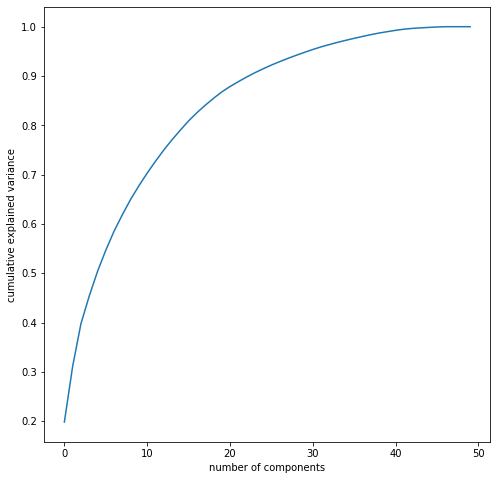

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

def plot_pca(X):
    # Perform PCA on the data to reduce the number of initial features 
    # and to remove correlations that are common between pixel features 
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    # Inspect the explained variances to determine how many components to use  
    plt.subplots(figsize=(8, 8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    print('Cumulative Explained variance at 200 components:',sum(pca.explained_variance_ratio_[0:49]) )

plot_pca(X_sm_scal)

In [160]:
# Convert X_sm to 200 principal components
pca = PCA(n_components=40)
X_sm_pca40 = pca.fit_transform(X_sm_scal)

#Training using Oversample Method
X_train, X_test, y_train, y_test = train_test_split(X_sm_pca40, y_sm, test_size=0.2, random_state=42)

clfsm=RandomForestClassifier(n_estimators=100)
clfsm.fit(X_train,y_train)
y_pred_sm=clfsm.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred_sm))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy: 0.8447017367228794


### Data Preparation for Regression Task <a name="data-prep-reg"></a>
Now let's deal with the dataset for the regression task.

For Education Dataset, we choose the Graduration Rate as our response variable for this regression task. Because only high school have valid graduration rate variables, we choose to start with 2014-2017 high school datasets below. One hot-encoding procedure has been conducted similiarly with the dataset above.

Data Preparation Workflow
- Data Merge
- Feature Selection
- Dimension Reduction

#### Data Merge
We combined dataset of all high schools in north Carolina from year 2014-2017 together. We also add a variable "Year" to note the calendar year the data come from.

In [13]:
# read in CSV
df2014 = pd.read_csv('https://raw.githubusercontent.com/jakemdrew/EducationDataNC/master/2014/Machine%20Learning%20Datasets/PublicHighSchools2014_ML.csv')
df2015 = pd.read_csv('https://raw.githubusercontent.com/jakemdrew/EducationDataNC/master/2015/Machine%20Learning%20Datasets/PublicHighSchools2015_ML.csv')
df2016 = pd.read_csv('https://raw.githubusercontent.com/jakemdrew/EducationDataNC/master/2016/Machine%20Learning%20Datasets/PublicHighSchools2016_ML.csv')
df2017 = pd.read_csv('https://raw.githubusercontent.com/jakemdrew/EducationDataNC/master/2017/Machine%20Learning%20Datasets/PublicHighSchools2017_ML.csv')

df2014.shape
df2015.shape
df2016.shape
df2017.shape

df2014['Year'] = 2014
df2015['Year'] = 2015 
df2016['Year'] = 2016 
df2017['Year'] = 2017 

frames = [df2014, df2015, df2016, df2017]
df_comb_test = pd.concat(frames,join='inner', ignore_index=True)

df_comb_test['Year']

(476, 351)

(480, 412)

(478, 373)

(470, 403)

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
1899    2017
1900    2017
1901    2017
1902    2017
1903    2017
Name: Year, Length: 1904, dtype: int64

In [14]:
schoolData = df_comb_test

#Remove schools with graduation rates == 0 from the model
schoolData = schoolData[schoolData['GraduationRate_5yr_All'] > 0]

#Find Response Variable
schoolData_GraduationRate_5yr = schoolData.GraduationRate_5yr_All

# Remove any columns from the model's training data that are directly related to the graduation rate. 
GradRateCols = schoolData.columns[schoolData.columns.str.lower().str.contains('graduation')]
GradRateCols

Index(['GraduationRate_5yr_All', 'GraduationRate_4yr_Female',
       'GraduationRate_5yr_Female', 'GraduationRate_4yr_Male',
       'GraduationRate_5yr_Male', 'GraduationRate_4yr_AmericanIndian',
       'GraduationRate_5yr_AmericanIndian', 'GraduationRate_4yr_Asian',
       'GraduationRate_5yr_Asian', 'GraduationRate_4yr_Black',
       'GraduationRate_5yr_Black', 'GraduationRate_4yr_Hispanic',
       'GraduationRate_5yr_Hispanic', 'GraduationRate_4yr_TwoorMoreRaces',
       'GraduationRate_5yr_TwoorMoreRaces', 'GraduationRate_4yr_White',
       'GraduationRate_5yr_White', 'GraduationRate_4yr_EDS',
       'GraduationRate_5yr_EDS', 'GraduationRate_4yr_LEP',
       'GraduationRate_5yr_LEP', 'GraduationRate_4yr_SWD',
       'GraduationRate_5yr_SWD', 'GraduationRate_4yr_AIG',
       'GraduationRate_5yr_AIG'],
      dtype='object')

In [15]:
#Delete the response variable and other graduation rate data columns from our training dataset
X_predGradRate = schoolData.drop(GradRateCols, axis=1)

Y_GradRate = schoolData_GraduationRate_5yr

#### Feature Selection

To test if there's redundant variables in the dataset, we decide to conduct a feature selection process to eliminate the least important features. 

There are many ways to conduct feature selection. In this project we use random forest and plot out feature importances of all features. Note that the work below is not for feasible model construction (we didn't split train/test) but just for picking out the most important variables to use.

Below is a benchmarking modeling we did using random forest regressor. The "default" MAE value is 4.91.

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error
rfr = RandomForestRegressor()
#rfr.fit(X_predGradRate, Y_GradRate)

scores = cross_val_score(rfr, X_predGradRate, Y_GradRate, cv=3, scoring='neg_mean_absolute_error')
predictions = cross_val_predict(rfr, X_predGradRate, Y_GradRate, cv=3)

#MAE
np.sqrt(mean_squared_error(Y_GradRate, predictions))

4.9216316612762325

In [17]:
#For feature importance from RandomForestRegressor()
import eli5
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(rfr, cv = None, refit = True, n_iter = 50).fit(X_predGradRate,Y_GradRate)

In [18]:
eli5.show_weights(perm, feature_names = X_predGradRate.columns.tolist(), top=263)

Weight,Feature
0.5986 ± 0.0301,SPG Score
0.0810 ± 0.0063,short_susp_per_c_num
0.0429 ± 0.0050,student_num
0.0297 ± 0.0043,lea_local_perpupil_num
0.0271 ± 0.0024,avg_daily_attend_pct
0.0148 ± 0.0014,TotalTargets_pTarget_PctMet
0.0105 ± 0.0010,EOCSubjects_CACR_All
0.0096 ± 0.0010,lea_avg_student_num
0.0076 ± 0.0009,BlackFemalePct
0.0071 ± 0.0007,lea_tchyrs_0thru3_pct


By above weights information, we identified the variables with weight "0", which are with least feature importance. We are filtering out those variables as shown below: 

In [16]:
LightWeight_Cols = X_predGradRate[[
'EOCBiology_CACR_AmericanIndian',
'EOCEnglish2_CACR_AmericanIndian',
'EVAAS Growth Status_NotMet',
'ACTWorkKeys_SilverPlus_Asian',
'grade_range_cd_9-13',
'calendar_type_txt_Regular School, Year-Round Calendar',
'ACTMath_ACTBenchmark_AmericanIndian',
'ACTScience_ACTBenchmark_LEP',
'Not Demostrated_TCHR_Standard 1_Pct',
'ACTWriting_ACTBenchmark_AmericanIndian',
'ACTReading_ACTBenchmark_LEP',
'Not Demostrated_TCHR_Standard 4_Pct',
'ACTMath_ACTBenchmark_LEP',
'grade_range_cd_7-12',
'grade_range_cd_K-12',
'grade_range_cd_7-13',
'grade_range_cd_8-12',
'grade_range_cd_PK-12',
'grade_range_cd_9-9',
'grade_range_cd_6-13',
'grade_range_cd_11-12',
'grade_range_cd_9-11',
'ACTWorkKeys_SilverPlus_LEP',
]]
#radRateCols = schoolData.columns[schoolData.columns.str.lower().str.contains('graduation')]
#   X_predGradRate = schoolData.drop(GradRateCols, axis=1)

In [17]:
X_predGradRate_pick = X_predGradRate.drop(LightWeight_Cols, axis=1)

In [21]:
X_predGradRate_pick.shape

(1811, 240)

After variable elimination we have 240 features left, we did another modeling and the MAE is 4.93, which is similiar with before. We can assume the elimination is proper.

In [22]:
predictions = cross_val_predict(rfr, X_predGradRate_pick, Y_GradRate, cv=3)

#MAE
np.sqrt(mean_squared_error(Y_GradRate, predictions))

4.950526244079372

#### Dimension Reduction

A PCA step has been conducted on the scaled dataset and a total of 240 PCA components are generated. By examining the plot below we identified that 200 components can already explain 99%+ of the variables. We experiment on just use 200 components to fit a elastic net model that has an error similiar with all 240 variables.

It indicates that only 200 variables (PCA components) are good representatives of the information. They can be used as a replacement for all 240 variables in the later modeling procedure.

Cumulative Explained variance at 200 components: 0.9952688254101744


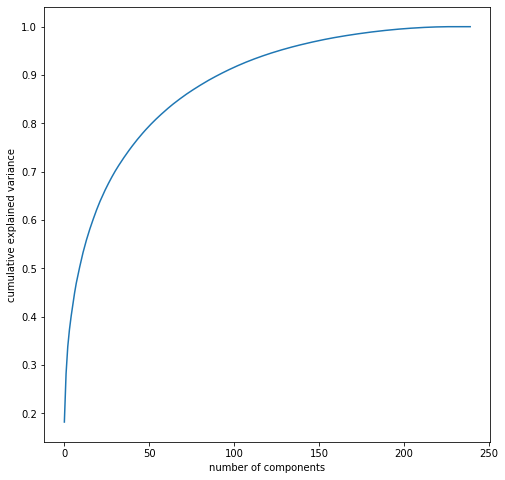

In [19]:
X_predGradRate_scal = ss.fit_transform(X_predGradRate_pick)

def plot_pca(X):
    # Perform PCA on the data to reduce the number of initial features 
    # and to remove correlations that are common between pixel features 
    pca = PCA(n_components=X.shape[1])
    pca.fit(X)

    # Inspect the explained variances to determine how many components to use  
    plt.subplots(figsize=(8, 8))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance');
    print('Cumulative Explained variance at 200 components:',sum(pca.explained_variance_ratio_[0:199]) )

    
plot_pca(X_predGradRate_scal)

In [20]:
# Convert X_sm to 200 principal components
pca = PCA(n_components=200)
X_predGradRate_pca200 = pca.fit_transform(X_predGradRate_scal)

Only 200 variables (PCA components) give MAE of 5.3, which is slightly higher than using all 240 variables.

In [149]:
predictions = cross_val_predict(rfr, X_predGradRate_pca200, Y_GradRate, cv=3)
np.sqrt(mean_squared_error(Y_GradRate, predictions))

5.3035661845480755

## Data Preparation 2 - The Dataset <a name="data-prep-2"></a>

Below we describe the final dataset used for the classification and regression tasks. Only the features selected in the above process are listed and describled.

In the following sessions, evaluation metrics are introduced specifically for the two tasks.

### Regression Dataset

In [ ]:
X_predGradRate_pick.head()

### Classification Dataset

In [ ]:
schoolData.head()

### Data Description

The data set contains 9,731 records and 259 attributes that are comprised of factors, numbers, and characters. A data definition sheet can be found in Dr. Drew's github repository, [https://github.com/jakemdrew/EducationDataNC](https://github.com/jakemdrew/EducationDataNC/tree/master/Data%20Documentation). To scale the data to be more manageable, our data set includes 50 of the 259 attributes. 

Below are some of the common attributes you'll see in our analyses below. For a complete list, the State of North Carolina provides a complete definition of all the attributes within our data set. This can be found on their website [https://www.dpi.nc.gov/](https://www.dpi.nc.gov/).

| Attribute | DataType | Description |
|:---|:---|:---|
| SPG Grade                          | object  | School Performance Grade (Letter Grade - A-D, F) |
| MinorityMalePct                    | float64 | Minority Male Perentage |
| MinorityFemalePct                  | float64 | Minority Female Percentage |
| short_susp_per_c_num               | float64 | Short term suspensions per 100 students at school level |
| avg_daily_attend_pct               | float64 | Average daily attendance percentage at school level |
| title1_type_cd_Y                   | uint8   | Title 1 Status |
| BlackMalePct                       | float64 | Black Male Percentage |
| AsianFemalePct                     | float64 | Asian Female Percentage |
| BlackFemalePct                     | float64 | Black Female Percentage |
| TotalTargets_pTarget_PctMet        | float64 | Percentage of total targets met |
| HispanicMalePct                    | float64 | Hispanic Male Percentage |
| MathGr3-8_pTarget_PctMet           | float64 | Percentage of students meeting Math target in grade levels 3 thru 8 |
| AsianMalePct                       | float64 | Asian Male Percentage |
| SciGr5&8_pTarget_PctMet            | float64 | Percentage of students meeting Science target in grade level 5 & 8 |
| nbpts_num                          | float64 | Number of National Board Certified Staff at school level |
| lea_sat_avg_score_num              | float64 | Average SAT score at LEA level |
| stud_internet_comp_num             | float64 | Ratio of students to internet connected computer at school level |
| st_avg_student_num                 | float64 | Average school size within the State |
| HispanicFemalePct                  | float64 | Hispanic Female Percentage |
| Accomplished_TCHR_Standard 4_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 4 |
| Accomplished_TCHR_Standard 3_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 3 |
| Developing_TCHR_Standard 2_Pct     | float64 | Percentage of developing teachers with teacher evaluation value of 2 |
| Accomplished_TCHR_Standard 5_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 5 |
| 10+ Years_LEA_Exp_Pct_Prin         | float64 | Percentage of principle with more than 10 years of experience at the LEA level |
| 4-10 Years_LEA_Exp_Pct_Prin        | float64 | Percentage of principle with 4-10 years of experience at the LEA level |
| Accomplished_TCHR_Standard 1_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 1 |
| Accomplished_TCHR_Standard 2_Pct   | float64 | Percentage of accomplished teachers with teacher evaluation value of 2 |
| Developing_TCHR_Standard 1_Pct     | float64 | Percentage of developing teachers with teacher evaluation value of 1 |
| pct_GCE_ALL                        | float64 | Percentage of Third Grade Students Passed with Good Cause Exemption |
| 0-3 Years_LEA_Exp_Pct_Prin         | float64 | Percentage of principle with 0-3 years of experience at the LEA level |
| st_emer_prov_teach_pct             | float64 | Emerging teachers at State level |
| lea_sat_participation_pct          | float64 | Percentage of HS students taking an SAT exam at the LEA level |
| lea_ap_participation_pct           | float64 | Advanced Placement participation at LEA level |
| lea_federal_perpupil_num           | float64 | Federal expense per pupil at LEA level |
| lea_local_perpupil_num             | float64 | Local expense per pupil at LEA level |
| advance_dgr_pct                    | float64 | Percent of teachers with masters or higher degree at school dgr |
| Developing_TCHR_Standard 5_Pct     | float64 | Percentage of teacher with level 5 in Developing |
| lateral_teach_pct                  | float64 | Lateral entry teacher percentage at school level |
| lea_flicensed_teach_pct            | float64 | Average Percent of Teachers that meet NC fully licensed |
| Developing_TCHR_Standard 3_Pct     | float64 | Percentage of teacher with level 3 in Developing |
| lea_tchyrs_0thru3_pct              | float64 | LEA level Teacher experiences 0 to 3 years  |
| lea_tchyrs_11plus_pct              | float64 | LEA level Teacher experiences over 11 years |
| lea_nbpts_num                      | float64 | Average number of National Board Certified staff at LEA |
| lea_advance_dgr_pct                | float64 | Average percent of teachers with masters or higher degree at LEA level |
| lea_1yr_tchr_trnovr_pct            | float64 | One Year Teacher turnover percentage at school level |
| lea_emer_prov_teach_pct            | float64 | Emerging teachers at LEA level |
| st_flicensed_teach_pct             | float64 | Average Percent of Teachers that meet NC fully licensed |
| st_tchyrs_0thru3_pct               | float64 | Percentage of teachers with 4-10 years of experience at the State level |
| st_1yr_tchr_trnovr_pct             | float64 | Standardize One Year Teacher turnover percentage at school level |
| lea_tchyrs_4thru10_pct             | float64 | Percentage of teachers with 4-10 years of experience at the LEA level |
| Category_Cd_T                      | uint8   | School with Category code T (School has middle and high school grades) |

## Models and Evaluation <a name="model-evaluation"></a>

### Model and Evaluation 1 <a name="model-evaluation-1"></a>

#### Evaluation Matrix for classification task:
- Accuracy, Precision and Recall
- Accuracy of each class
- Confusion Matrix
- ROC curves of each class and all classes

The most common used metric used to evaluate classification models is accuracy. The classification accuracy measures the performance of classification model. A basic accuracy calculation is the correct number of predictions compared to the total number of predictions. With a simple calculation, the accuracy result is easy to understand and interpret. In addition to the mathematical equation and result, the accuracy can be represented graphically in a scatter plot. A good accuracy score is generally around 90%. There is also an error rate that represents the total number of incorrect predictions by the total number of predictions. Both Accuracy and incorrect predictions can be displayed visually in a confusion matrix.

Below we demonstrate the usage of the matrix by results from the above Random Forest classifer and SMOTE data.

Accuracy, Precision and Recall

In [15]:
# Compare input and predictions
y=y_test
yhat=y_pred_sm

# get various measures of performance
total_accuracy = mt.accuracy_score(y, yhat)

rec_tot = []
prec_tot = []

for cls in np.unique(y):
    idx = (y==cls) # get classes
    ytmp_actual = np.zeros(y.shape) # make binary class problem
    ytmp_actual[idx] = 1 # set the instances for this specific class
    
    ytmp_predicted = np.zeros(y.shape) # binary prediction array
    ytmp_predicted[yhat==cls] = 1
    
    #num_in_class = sum(idx)
    
    rec = mt.recall_score(ytmp_actual, ytmp_predicted)
    prec = mt.precision_score(ytmp_actual, ytmp_predicted)
    rec_tot.append(rec)
    prec_tot.append(prec)

print ('Total Accuracy:',total_accuracy)
print ('Recalls for each class:',rec_tot)
print ('Precisions for each class:',prec_tot)

Total Accuracy: 0.8751573118550214
Recalls for each class: [0.9731113956466069, 0.8573170731707317, 0.7232375979112271, 0.8428571428571429, 0.9817232375979112]
Precisions for each class: [0.9523809523809523, 0.8531553398058253, 0.7759103641456583, 0.8509615384615384, 0.9341614906832298]


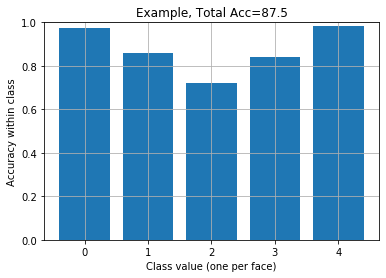

In [16]:
def per_class_accuracy(y,yhat):
    conf = mt.confusion_matrix(y,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Class value (one per face)')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()
 

plot_class_acc(y,yhat,title="Example")

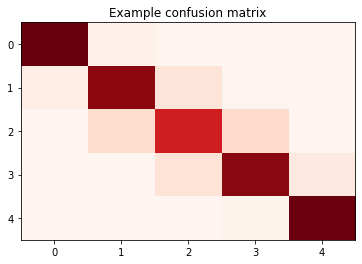

In [17]:
# how about plotting a confusion matrix?
def plot_conf(y, yhat, title=''):
    cm = mt.confusion_matrix(y, yhat)
    plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto')
    plt.title(title)
    plt.grid(False)
    
plot_conf(y,yhat,title="Example confusion matrix")

In [133]:
# Probability Matrix
yhat_score = clfsm.predict_proba(X_test)
yhat_score

array([[0.  , 0.  , 0.03, 0.2 , 0.77],
       [0.  , 0.01, 0.34, 0.59, 0.06],
       [0.  , 0.  , 0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.09, 0.45, 0.45, 0.01],
       [0.  , 0.  , 0.03, 0.1 , 0.87],
       [0.  , 0.02, 0.29, 0.6 , 0.09]])

Encode the response variable into numeric values

In [32]:
y_test_org = y_test
y_test= np.select(
    [
        y_test == 'A', 
        y_test == 'B',
        y_test == 'C',
        y_test == 'D',
        y_test == 'F',
    ], 
    [
        '0', 
        '1',
        '2',
        '3',
        '4',
    ],
    default='NA'
)

y = y_test.astype(int)

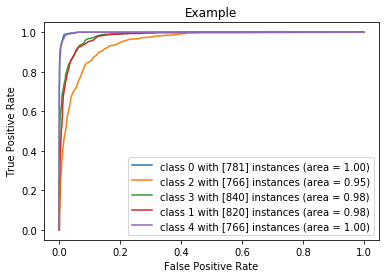

In [134]:
# Compute ROC curve for a subset of interesting classes
def PlotROC_eachClass(y_score,title=''):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in np.unique(y):
        fpr[i], tpr[i], _ = mt.roc_curve(y, y_score[:, i], pos_label=i)
        roc_auc[i] = mt.auc(fpr[i], tpr[i])

    for i in np.random.permutation(5)[0:5]:
        plt.plot(fpr[i], tpr[i], label='class {0} with {1} instances (area = {2:0.2f})'
                                       ''.format(i, sum(y==i), roc_auc[i]))

    plt.legend(loc="lower right")  
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.show()

PlotROC_eachClass(yhat_score,title='Example')

Encode the response variables into binarized variables

In [35]:
from sklearn.preprocessing import label_binarize
one_hot_class_encoding = label_binarize(y,np.unique(y))
one_hot_class_encoding

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0]])

In [38]:
def PlotROC_All(y_score):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr["micro"], tpr["micro"], _ = mt.roc_curve(one_hot_class_encoding.ravel(), y_score.ravel())
    roc_auc["micro"] = mt.auc(fpr["micro"], tpr["micro"])

    plt.figure(figsize=(12,4))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]))
    return roc_auc["micro"]

0.9864610757650638

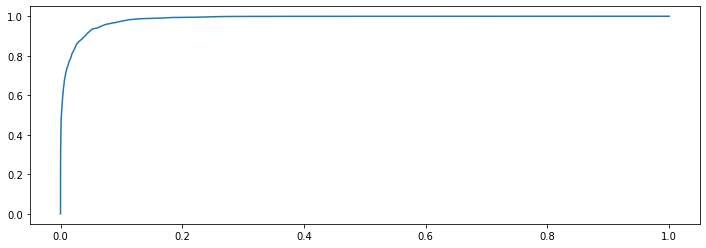

In [39]:
PlotROC_All(yhat_score)

#### Evaluation Matrix for regression task:
- MAE
- RMSE 
- MAPE

The mean absolute error (MAE)

The root mean square error (RMSE) 

The mean absolute percentage error (MAPE), also known as mean absolute percentage deviation (MAPD), is a measure of prediction accuracy of a forecasting method in statistics, for example in trend estimation, also used as a loss function for regression problems in machine learning.

As shown below, MAE, RMSE and MAPE are chosen to evaluate the model performance. Below are the functions that will be used in model creation and evaluation sessions.

In [53]:
#Divide data into test and training splits
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.10, random_state=42)

In [33]:
#The below function reference to https://github.com/jakemdrew/DataMiningNotebooks/blob/master/07.%20Regression.ipynb
#Use mean absolute error (MAE) to score the regression models created 
#(the scale of MAE is identical to the response variable)
from sklearn.metrics import mean_absolute_error, make_scorer, mean_squared_error

#Function for Root mean squared error
def rmse(y_actual, y_predicted):
    return np.sqrt(mean_squared_error(y_actual, y_predicted))

#Function for Mean Absolute Percentage Error (MAPE) - Untested
#Adapted from - https://stackoverflow.com/questions/42250958/how-to-optimize-mape-code-in-python
def mape(y_actual, y_predicted): 
    mask = y_actual != 0
    return (np.fabs(y_actual - y_predicted)/y_actual)[mask].mean() * 100

#Create scorers for rmse and mape functions
mae_scorer = make_scorer(score_func=mean_absolute_error, greater_is_better=False)
rmse_scorer = make_scorer(score_func=rmse, greater_is_better=False)
mape_scorer = make_scorer(score_func=mape, greater_is_better=False)

#Make scorer array to pass into cross_validate() function for producing mutiple scores for each cv fold.
errorScoring = {'MAE':  mae_scorer, 
                'RMSE': rmse_scorer,
                'MAPE': mape_scorer
               }

In [34]:
from sklearn.model_selection import cross_validate

def EvaluateRegressionEstimator(regEstimator, X, y, cv):
    
    scores = cross_validate(regEstimator, X, y, scoring=errorScoring, cv=cv, return_train_score=True)

    #cross val score sign-flips the outputs of MAE
    scores['test_MAE'] = scores['test_MAE'] * -1
    scores['test_MAPE'] = scores['test_MAPE'] * -1
    scores['test_RMSE'] = scores['test_RMSE'] * -1

    #print mean MAE for all folds 
    maeAvg = scores['test_MAE'].mean()
    print_str = "The average MAE for all cv folds is: \t\t\t {maeAvg:.5}"
    print(print_str.format(maeAvg=maeAvg))

    #print mean test_MAPE for all folds
    scores['test_MAPE'] = scores['test_MAPE']
    mape_avg = scores['test_MAPE'].mean()
    print_str = "The average MAE percentage (MAPE) for all cv folds is: \t {mape_avg:.5}"
    print(print_str.format(mape_avg=mape_avg))

    #print mean MAE for all folds 
    RMSEavg = scores['test_RMSE'].mean()
    print_str = "The average RMSE for all cv folds is: \t\t\t {RMSEavg:.5}"
    print(print_str.format(RMSEavg=RMSEavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['MAE'] = scores['test_MAE']
    scoresResults['MAPE'] = scores['test_MAPE']
    scoresResults['RMSE'] = scores['test_RMSE']
    return scoresResults

### Model and Evaluation 2 <a name="model-evaluation-2"></a>

To conduct cross-validation for our model robustness, we need to split the dataset into training and testing set. Below we show two criterias we use in later experiment for the splitting:
- ShuffleSplit

In ShuffleSplit we use a proportion of 80/20 for the training/testing dataset.

Both splits are set to the same random_state number.

#### Training Splits for Regression and Classfication using 10 splits

In [21]:
# Using ShuffleSplit for Training/Testing Split 
from sklearn.model_selection import ShuffleSplit

num_cv_iterations = 10
num_instances = len(schoolData_SPG)
cv_object = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,random_state=42)
                         
print(cv_object)

ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)


In [30]:
# Using ShuffleSplit for Training/Testing Split 
from sklearn.model_selection import ShuffleSplit


num_cv_iterations = 10
num_instances = len(Y_GradRate)
cv_object_reg = ShuffleSplit(n_splits=num_cv_iterations,
                         test_size  = 0.2,random_state=42)
                         
print(cv_object_reg)

ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None)


### Model and Evaluation 3 <a name="model-evaluation-3"></a>

### Regression Task <a name="regression"></a>

#### Method 1: Linear Regression

In [31]:
#Make new estimator compatible for use with GridSearchCV() and cross_validate()
# -  Cap predict function for LinearRegression between 0 and 100
# -  See: Roll your own estimator links above for details. 
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.linear_model import LinearRegression

class CappedLinearRegression(LinearRegression):

    def predict(self, X):
        return np.clip(super(CappedLinearRegression, self).predict(X), 0, 100)

In [35]:
#Create a Linear Regression object and perform a grid search to find the best parameters
linreg = CappedLinearRegression()
parameters = {'normalize':(True,False), 'fit_intercept':(True,False)}

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_object_reg # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_predGradRate_pick, Y_GradRate)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    2.5s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.2, train_size=None),
             estimator=CappedLinearRegression(),
             param_grid={'fit_intercept': (True, False),
                         'normalize': (True, False)},
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [36]:
#Print the parameterization of the best estimator
regGridSearch.best_estimator_

CappedLinearRegression(fit_intercept=False, normalize=True)

In [51]:
#Create CappedLinearRegression predictions between 0 and 100% using the best parameters for our Linear Regression object
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, X_predGradRate_pick, Y_GradRate, cv_object_reg)

The average MAE for all cv folds is: 			 3.7278
The average MAE percentage (MAPE) for all cv folds is: 	 4.2409
The average RMSE for all cv folds is: 			 5.0167
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,3.958126,4.526061,5.281526
1,3.765460,4.282703,5.042052
2,3.597048,4.120673,4.910314
3,3.907647,4.526584,5.464033
4,3.682695,4.138153,4.865911
5,3.729186,4.191850,4.980548
6,3.463969,3.954264,4.648912
7,3.885060,4.373731,5.164967
8,3.660765,4.183670,5.136378
9,3.627640,4.111376,4.672744


In [43]:
regEstimator_linear = regEstimator

In [ ]:
#Create a Linear Regression object and perform a grid search to find the best parameters
linreg = CappedLinearRegression()
parameters = {'normalize':(True,False), 'fit_intercept':(True,False)}

CappedLinearRegression(fit_intercept=False, normalize=True, alpha=.05)

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=linreg
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv_object_reg # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_predGradRate_pick, Y_GradRate)
regGridSearch.predict(X)

#### Method 2 - Lasso

In [40]:
%%time
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Lasso

reg = Lasso(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=10000, precompute=True, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 10, 20]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

Wall time: 0 ns


In [41]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.model_selection import RandomizedSearchCV
regGridSearch = RandomizedSearchCV(estimator = reg, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regGridSearch.fit(X_predGradRate_pick, Y_GradRate)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:    3.6s finished


RandomizedSearchCV(cv=3,
                   estimator=Lasso(max_iter=10000, normalize=True,
                                   precompute=True, random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'alpha': [0.001, 0.1, 1, 10, 20],
                                        'selection': ['cyclic', 'random'],
                                        'warm_start': [True, False]},
                   random_state=42, verbose=2)

In [186]:
#Print the parameterization of the best estimator
regGridSearch.best_estimator_

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, positive=False, precompute=True, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=True)

In [187]:
EvaluateRegressionEstimator(regGridSearch.best_estimator_, X_predGradRate_pick, Y_GradRate, cv_object_reg)

The average MAE for all cv folds is: 			 3.7278
The average MAE percentage (MAPE) for all cv folds is: 	 4.2409
The average RMSE for all cv folds is: 			 5.0167
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,3.958126,4.526061,5.281526
1,3.765460,4.282703,5.042052
2,3.597048,4.120673,4.910314
3,3.907647,4.526584,5.464033
4,3.682695,4.138153,4.865911
5,3.729186,4.191850,4.980548
6,3.463969,3.954264,4.648912
7,3.885060,4.373731,5.164967
8,3.660765,4.183670,5.136378
9,3.627640,4.111376,4.672744


In [207]:
regEstimator_lasso = Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, positive=False, precompute=True, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=True)

#### Method3: Ridge Regression

In [188]:
%%time
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import Ridge

reg = Ridge(fit_intercept=True, normalize=True,copy_X=True
          , max_iter=1000, tol=0.0001, random_state=0)

#Test parameters 
alpha = [0.001, 0.1, 1, 5, 10, 20]
solver = [ 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
parameters = {'alpha': alpha, 'solver': solver}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_predGradRate_pick, Y_GradRate)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   52.6s
[Parallel(n_jobs=8)]: Done 360 out of 360 | elapsed:   59.8s finished


Wall time: 1min


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.1, train_size=None),
             error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, random_state=0,
                             solver='auto', tol=0.0001),
             iid='deprecated', n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 5, 10, 20],
                         'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg',
                                    'sag', 'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [189]:
#Display the best estimator parameters
regGridSearch.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      random_state=0, solver='lsqr', tol=0.0001)

In [190]:
#Create a regression estimator with best parameters for cross validation
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X_predGradRate_pick, Y_GradRate, cv_object_reg)

The average MAE for all cv folds is: 			 3.7776
The average MAE percentage (MAPE) for all cv folds is: 	 4.2973
The average RMSE for all cv folds is: 			 5.0698
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,3.991388,4.569749,5.312759
1,3.832324,4.352253,5.107567
2,3.565917,4.084237,4.886201
3,3.981126,4.607789,5.539893
4,3.722056,4.186120,4.909159
5,3.791476,4.265086,5.052601
6,3.473170,3.963489,4.649137
7,4.006161,4.505586,5.271517
8,3.709190,4.242415,5.174782
9,3.703347,4.196511,4.794333


In [196]:
regEstimator_ridge = Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      random_state=0, solver='lsqr', tol=0.0001)

#### Method4: Elastic Net Regression

In [191]:
%%time
#Create a regression object and perform a grid search to find the best parameters
from sklearn.linear_model import ElasticNet

reg = ElasticNet(fit_intercept=True, normalize=True, precompute=True, copy_X=True
          , max_iter=10000, tol=0.0001, random_state=0)
 
#Test parameters
l1_ratio = [0.001, 0.01, 0.1, 0.5, 0.75, 1]
alpha = [0.001, 0.1, 1, 10]
selection = ['cyclic','random']
warm_start = [True, False]
parameters = {'l1_ratio': l1_ratio, 'alpha': alpha, 'selection': selection, 'warm_start': warm_start}

#Create a grid search object using the parameters above
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=reg
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring=mae_scorer)

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_predGradRate_pick, Y_GradRate)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 352 tasks      | elapsed:    6.2s
[Parallel(n_jobs=8)]: Done 852 tasks      | elapsed:   14.4s


Wall time: 16.3 s


[Parallel(n_jobs=8)]: Done 960 out of 960 | elapsed:   15.9s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.1, train_size=None),
             error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=10000, normalize=True,
                                  positive=False, precompute=True,
                                  random_state=0, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=8,
             param_grid={'alpha': [0.001, 0.1, 1, 10],
                         'l1_ratio': [0.001, 0.01, 0.1, 0.5, 0.75, 1],
                         'selection': ['cyclic', 'random'],
                         'warm_start': [True, False]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(mean_absolute_error, greater_is_better=False),
             verbose=1)

In [192]:
#Display the best estimator parameters
regGridSearch.best_estimator_

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=10000, normalize=True, positive=False, precompute=True,
           random_state=0, selection='random', tol=0.0001, warm_start=True)

In [193]:
#Create a regression estimator with best parameters for cross validation
regEstimator = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics.
EvaluateRegressionEstimator(regEstimator, X_predGradRate_pick, Y_GradRate, cv_object_reg)

The average MAE for all cv folds is: 			 3.7278
The average MAE percentage (MAPE) for all cv folds is: 	 4.241
The average RMSE for all cv folds is: 			 5.0168
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,3.958065,4.526038,5.281583
1,3.765588,4.282855,5.042087
2,3.597344,4.120997,4.910623
3,3.907880,4.526849,5.464369
4,3.682284,4.137743,4.865584
5,3.729408,4.192091,4.980690
6,3.463965,3.954278,4.648838
7,3.885004,4.373666,5.164939
8,3.660996,4.183964,5.136645
9,3.627731,4.111482,4.672796


In [197]:
regEstimator_elastic=ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=10000, normalize=True, positive=False, precompute=True,
           random_state=0, selection='random', tol=0.0001, warm_start=True)

#### Method5: Random Forest Regression

In [54]:
%%time
#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.ensemble import RandomForestRegressor

linreg = RandomForestRegressor()
parameters = {'bootstrap': [True, False],
               'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [130, 180, 230]}

Wall time: 0 ns


In [55]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
from sklearn.model_selection import RandomizedSearchCV
regGridSearch = RandomizedSearchCV(estimator = linreg, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regGridSearch.fit(X_predGradRate_pick, Y_GradRate)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 37.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [56]:
#Display the best estimator parameters
regGridSearch.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=230, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [199]:
%%time
from sklearn.ensemble import RandomForestRegressor

#regEstimator = regGridSearch.best_estimator_
regEstimator = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, X_predGradRate_pick, Y_GradRate, cv_object_reg)

The average MAE for all cv folds is: 			 3.5626
The average MAE percentage (MAPE) for all cv folds is: 	 4.0712
The average RMSE for all cv folds is: 			 4.7978
*********************************************************
Cross Validation Fold Mean Error Scores
Wall time: 38.5 s


,MAE,MAPE,RMSE
0,3.730118,4.301101,4.982039
1,3.677545,4.190858,4.739596
2,3.400732,3.917889,4.674852
3,3.746934,4.350831,5.297056
4,3.659453,4.149805,4.787459
5,3.361619,3.792805,4.586277
6,3.338955,3.818074,4.392172
7,3.775417,4.267467,5.010593
8,3.486633,4.002577,4.994766
9,3.448443,3.920145,4.513671


In [203]:
regEstimator_rf = RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

#### Method6: Multilayer Perceptron Regression

In [226]:
#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.neural_network import MLPRegressor

linreg = MLPRegressor()
parameters = { 'activation':['logistic']
              ,'hidden_layer_sizes' : [200]
              ,'solver': ['sgd','adam']
              ,'alpha': [0.001]
              ,'batch_size':['auto'] 
              ,'random_state': [0]
              ,'learning_rate': ['constant', 'invscaling', 'adaptive']
              ,'learning_rate_init':[0.001]
              ,'power_t':[0.5]
              ,'max_iter':[1000]
             }

# Random search of parameters, using 3 fold cross validation, 
regGridSearch = RandomizedSearchCV(estimator = linreg, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regGridSearch.fit(X_predGradRate_pick, Y_GradRate)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                          batch_size='auto', beta_1=0.9,
                                          beta_2=0.999, early_stopping=False,
                                          epsilon=1e-08,
                                          hidden_layer_sizes=(100,),
                                          learning_rate='constant',
                                          learning_rate_init=0.001,
                                          max_fun=15000, max_iter=200,
                                          momentum=0.9, n_iter_no_change=10,
                                          nesterovs_momentum=True, power_t=0.5,
                                          random_...
                   param_distributions={'activation': ['logistic'],
                                        'alpha': [0.001],
                                        'batch_size': ['auto'],

In [201]:
%%time
from sklearn.neural_network import MLPRegressor

#regEstimator = regGridSearch.best_estimator_
regEstimator = MLPRegressor(activation='logistic', alpha=0.001, hidden_layer_sizes=200,
             learning_rate='adaptive', max_iter=1000, random_state=0,
             solver='sgd')

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, X_predGradRate_pick, Y_GradRate, cv_object_reg)

The average MAE for all cv folds is: 			 5.7772
The average MAE percentage (MAPE) for all cv folds is: 	 6.5397
The average RMSE for all cv folds is: 			 7.1812
*********************************************************
Cross Validation Fold Mean Error Scores
Wall time: 1min 23s


,MAE,MAPE,RMSE
0,5.744976,6.513832,7.181451
1,5.997395,6.811153,7.314575
2,5.706905,6.502644,7.161170
3,5.709290,6.561662,7.293855
4,5.721912,6.463572,7.070936
5,5.635539,6.324577,7.019271
6,5.744937,6.538677,7.140355
7,5.822840,6.505928,7.229979
8,5.997360,6.766434,7.383345
9,5.690796,6.408039,7.016766


In [204]:
regEstimator_mpr = MLPRegressor(activation='logistic', alpha=0.001, hidden_layer_sizes=200,
             learning_rate='adaptive', max_iter=1000, random_state=0,
             solver='sgd')

#### Method7: ExtraTrees Regression

In [223]:
#Create a Linear Regression object and perform a grid search to find the best parameters
from sklearn.ensemble import ExtraTreesRegressor

linreg = ExtraTreesRegressor()
parameters = { 'min_samples_split':[2,3,4,5]
              ,'n_estimators' : [500]
              ,'min_samples_leaf': [10, 25, 50]
              ,'criterion': ['mae']
              ,'n_jobs':[-1]
              ,'random_state': [0]
             }


# Random search of parameters, using 3 fold cross validation, 
regGridSearch = RandomizedSearchCV(estimator = linreg, param_distributions = parameters, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
regGridSearch.fit(X_predGradRate_pick, Y_GradRate)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 75.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                                 criterion='mse',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,
                         

In [202]:
%%time
from sklearn.ensemble import ExtraTreesRegressor

#regEstimator = regGridSearch.best_estimator_
regEstimator = ExtraTreesRegressor(bootstrap=False, criterion='mae', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=10, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=8,
          oob_score=False, random_state=0, verbose=0, warm_start=False)


#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, X_predGradRate_pick, Y_GradRate, cv_object_reg)

The average MAE for all cv folds is: 			 3.5309
The average MAE percentage (MAPE) for all cv folds is: 	 4.0723
The average RMSE for all cv folds is: 			 4.9883
*********************************************************
Cross Validation Fold Mean Error Scores
Wall time: 46min 4s


,MAE,MAPE,RMSE
0,3.746927,4.353989,5.292765
1,3.561691,4.102180,4.884989
2,3.379538,3.917506,4.889207
3,3.701200,4.338272,5.443005
4,3.669059,4.192769,5.019663
5,3.306785,3.767323,4.687951
6,3.325578,3.833868,4.488795
7,3.648585,4.159992,5.081601
8,3.541158,4.122963,5.375220
9,3.428707,3.934209,4.719461


In [205]:
regEstimator_ext = ExtraTreesRegressor(bootstrap=False, criterion='mae', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=10, min_samples_split=2,
          min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=8,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

#### Method 7 Addition: Using PCA inputs for ExtraTrees Regression

In [219]:
#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateRegressionEstimator(regEstimator, X_predGradRate_pca200, Y_GradRate, cv_object_reg)

The average MAE for all cv folds is: 			 3.7822
The average MAE percentage (MAPE) for all cv folds is: 	 4.3597
The average RMSE for all cv folds is: 			 5.2262
*********************************************************
Cross Validation Fold Mean Error Scores


,MAE,MAPE,RMSE
0,3.915734,4.547347,5.443340
1,3.824547,4.404053,5.112620
2,3.715319,4.315420,5.190370
3,4.057401,4.729000,5.805256
4,3.924587,4.485871,5.275248
5,3.550733,4.042485,4.871934
6,3.500474,4.047992,4.789437
7,3.882652,4.423788,5.326325
8,3.823327,4.436705,5.533705
9,3.627717,4.164133,4.913397


The results above using the principle components are not better than using the original variables. So we are not using the dimension reduced dataset for our final selected model.

### Classification Task <a name="classification"></a>
After we address the data imbalance issue using UnderSample (2 method types) and SMOTE, we ran several classifier methods to obtain the best accuracy. 

#### Method 1: K Nearest Neighbour(KNN)

First, we begin by running KNN. We use scaled data, as well as shuffle split to create the training and testing sets. We were surprised to see that the accuracy, precision, and recall of this model are relatively high (all came out to 0.86). We suspect that for deployment purposes, this could be a significant finding, considering that this model is nearly as accurate as SVM, and is easier to explain to stakeholders. Also, anecdotally, we observe that it performs better than SVM.

In [25]:
#let's see what scaling and tuning does to the overall accuracy

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

ss = StandardScaler()

X_sm_scal = ss.fit_transform(X_sm)

for train_indices, test_indices in cv_object.split(X_sm_scal,y_sm): 

    X_train_scaled = X_sm_scal[train_indices]
    y_train = y_sm.values[train_indices]
    
    X_test_scaled = X_sm_scal[test_indices]
    y_test = y_sm.values[test_indices]

In [48]:
#X_train_scaled = ss.fit_transform(X_train)
#X_test_scaled = ss.fit_transform(X_test)

#Now let's do a grid search with KNN

param_grid_knn = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
                 'weights': ['uniform', 'distance'],
                 'metric': ['euclidean', 'manhattan']}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, verbose=1, cv=3, n_jobs=-1)

grid_knn.fit(X_train_scaled, y_train)

In [48]:
print(grid_knn.best_params_)
print(grid_knn.best_score_)

{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
0.834067275842156


In [26]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

knn_mod = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')

knn_mod.fit(X_train_scaled, y_train)

pred_knn = knn_mod.predict(X_test_scaled)

print(accuracy_score(y_test, pred_knn))
print(precision_score(y_test, pred_knn, average='weighted'))
print(recall_score(y_test, pred_knn, average='weighted'))
print(confusion_matrix(y_test, pred_knn))



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

0.8643342562295495
0.860152878850106
0.8643342562295495
[[780   2   0   0   0]
 [ 36 721  77   5   0]
 [ 12 182 452 133  12]
 [  0   6  49 690  22]
 [  0   0   0   3 791]]


#### Method 2: Naive Bayes

As discussed above, KNN seems to be a solid algorithm for this problem. But what about naive Bayes? Unfortunately, no matter which combination of parameters we pass to naive bayes, it doesn't seem to fit our data very well. The highest accuracy we observe is just under 50%, which comes nowhere close to what we observe with other models.   

In [55]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

alphas = [0, .001, 1]
binarize = [0.0, 0.02, 0.04]

for alph in alphas:
    for binar in binarize:
        clf_mnb = MultinomialNB(alpha=alph)
        clf_bnb = BernoulliNB(alpha=alph, binarize=binar)
        clf_mnb.fit(X_train, y_train)
        y_hat_mnb = clf_mnb.predict(X_test)
        clf_bnb.fit(X_train, y_train)
        y_hat_bnb = clf_bnb.predict(X_test)
        print('MNB Accuracy Score with alpha=' + str(alph) + ' is ' + str(accuracy_score(y_test, y_hat_mnb)))
        print('BNB Accuracy Score with alpha=' + str(alph) + ' and binarize=' + str(binar) +  ' is ' + str(accuracy_score(y_test, y_hat_bnb)))
        


MultinomialNB(alpha=0)

BernoulliNB(alpha=0)

MNB Accuracy Score with alpha=0 is 0.3621948150012585
BNB Accuracy Score with alpha=0 and binarize=0.0 is 0.4319154291467405


MultinomialNB(alpha=0)

BernoulliNB(alpha=0, binarize=0.02)

MNB Accuracy Score with alpha=0 is 0.3621948150012585
BNB Accuracy Score with alpha=0 and binarize=0.02 is 0.45255474452554745


MultinomialNB(alpha=0)

BernoulliNB(alpha=0, binarize=0.04)

MNB Accuracy Score with alpha=0 is 0.3621948150012585
BNB Accuracy Score with alpha=0 and binarize=0.04 is 0.47646614648879937


MultinomialNB(alpha=0.001)

BernoulliNB(alpha=0.001)

MNB Accuracy Score with alpha=0.001 is 0.3621948150012585
BNB Accuracy Score with alpha=0.001 and binarize=0.0 is 0.4319154291467405


MultinomialNB(alpha=0.001)

BernoulliNB(alpha=0.001, binarize=0.02)

MNB Accuracy Score with alpha=0.001 is 0.3621948150012585
BNB Accuracy Score with alpha=0.001 and binarize=0.02 is 0.45255474452554745


MultinomialNB(alpha=0.001)

BernoulliNB(alpha=0.001, binarize=0.04)

MNB Accuracy Score with alpha=0.001 is 0.3621948150012585
BNB Accuracy Score with alpha=0.001 and binarize=0.04 is 0.47621444752076514


MultinomialNB(alpha=1)

BernoulliNB(alpha=1)

MNB Accuracy Score with alpha=1 is 0.3621948150012585
BNB Accuracy Score with alpha=1 and binarize=0.0 is 0.4311603322426378


MultinomialNB(alpha=1)

BernoulliNB(alpha=1, binarize=0.02)

MNB Accuracy Score with alpha=1 is 0.3621948150012585
BNB Accuracy Score with alpha=1 and binarize=0.02 is 0.4523030455575132


MultinomialNB(alpha=1)

BernoulliNB(alpha=1, binarize=0.04)

MNB Accuracy Score with alpha=1 is 0.3621948150012585
BNB Accuracy Score with alpha=1 and binarize=0.04 is 0.4757110495846967


#### Method 3: Support Vector Machine
As we observed in the mini lab, SVM is a great model choice for this problem. With minimal parameter tuning, we observe that our model is able to predict SPG grade with an accuracy, precision, and recall of 89%.

In [68]:
from sklearn.svm import SVC

param_grid_svm = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 
             'kernel': ['rbf', 'sigmoid']}

grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=2, n_jobs=-1)
grid_svm.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  9.0min finished


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [69]:
print(grid_svm.best_params_)
print(grid_svm.best_score_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.8800652725930533


In [27]:
from sklearn.svm import SVC
svm_mod = SVC(C=10, gamma=0.1, kernel='rbf')

svm_mod.fit(X_train_scaled, y_train)

pred_svm = svm_mod.predict(X_test_scaled)

print(accuracy_score(y_test, pred_svm))
print(precision_score(y_test, pred_svm, average='weighted'))
print(recall_score(y_test, pred_svm, average='weighted'))
print(confusion_matrix(y_test, pred_svm))

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

0.893279637553486
0.8929553246243165
0.893279637553486
[[768   5   9   0   0]
 [ 12 716 109   2   0]
 [  2 103 592  91   3]
 [  0   3  73 685   6]
 [  0   0   1   5 788]]


#### Method 4: Decision Trees and Initial Attempt at an Ensemble
Next, we fit a decision tree to the data and observed that the overall accuracy was reasonably high, but not as high as in the KNN and SVM models (76%). While this model isn't something that we would deploy on its own, it might be a good candidate for a weak learner in an ensemble model (see below).

In [70]:
from sklearn.tree import DecisionTreeClassifier

param_grid_tree = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, n_jobs=-1)
grid_tree.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [71]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)

{'criterion': 'entropy', 'max_depth': 70}
0.7610115826584585


In [29]:
from sklearn.tree import DecisionTreeClassifier
tree_mod = DecisionTreeClassifier(criterion='entropy', max_depth=70)

tree_mod.fit(X_train, y_train)

pred_tree = tree_mod.predict(X_test)

print(accuracy_score(y_test, pred_tree))
print(confusion_matrix(y_test, pred_tree))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=70, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0.2008557764913164
[[165 126 186 155 150]
 [179 144 171 174 171]
 [136 162 171 157 165]
 [153 147 165 160 142]
 [175 163 149 149 158]]


SVM, decision tree, and KNN seem like interesting candidates for weak learners in an ensemble model. In order to make that work, we'll need to re-train the decision tree on scaled data and see if it generates the same results.

In [74]:
param_grid_tree = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}

grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid_tree, n_jobs=-1)
grid_tree.fit(X_train_scaled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150]})

In [75]:
print(grid_tree.best_params_)
print(grid_tree.best_score_)

{'criterion': 'entropy', 'max_depth': 40}
0.7615149449730186


In [30]:
from sklearn.tree import DecisionTreeClassifier
tree_mod = DecisionTreeClassifier(criterion='entropy', max_depth=40)

tree_mod.fit(X_train_scaled, y_train)

pred_tree = tree_mod.predict(X_test_scaled)

print(accuracy_score(y_test, pred_tree))
print(precision_score(y_test, pred_tree, average='weighted'))
print(recall_score(y_test, pred_tree, average='weighted'))
print(confusion_matrix(y_test, pred_tree))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=40, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

0.7593757865592751
0.7555560241863529
0.7593757865592751
[[725  45  10   1   1]
 [ 74 594 143  28   0]
 [ 10 174 451 150   6]
 [  1  13 141 520  92]
 [  0   0   4  63 727]]


As we can see, even with scaled data, our decision tree performs quite well. Let's now ensemble the models and see if that yields something even more accurate. For simplicity, we're going to use a voting classifier that employs "hard" voting (majority rules).

In [87]:
from sklearn.ensemble import VotingClassifier

mod_voting_hard = VotingClassifier(estimators=[('KNN', knn_mod),
                                               ('SVM', svm_mod),
                                               ('DecisionTree', tree_mod)], voting='hard')

mod_voting_hard.fit(X_train_scaled, y_train)

pred_voting_hard = mod_voting_hard.predict(X_test_scaled)

print(accuracy_score(y_test, pred_voting_hard))
print(precision_score(y_test, pred_voting_hard, average='weighted'))
print(recall_score(y_test, pred_voting_hard, average='weighted'))
print(confusion_matrix(y_test, pred_voting_hard))

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=1)),
                             ('SVM', SVC(C=10, gamma=0.1)),
                             ('DecisionTree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=40))])

0.8726403221746791
0.8691490858545052
0.8726403221746791
[[732   1   0   0   0]
 [ 44 652  96   1   0]
 [ 15 145 559 103   2]
 [  1   4  77 732  14]
 [  0   1   0   2 792]]


Sadly, this isn't any better than our SVM (possibly even worse). What if we replaced the decision tree weak learner with random forests?

#### Method5: Random Forest

In [90]:
from sklearn.model_selection import RandomizedSearchCV

param_grid_rf = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

#Have to do random search since grid search takes forever
grid_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid_rf, refit=True, verbose=2, n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.8min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 16.6min finished


RandomizedSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [91]:
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'n_estimators': 1400, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}
0.873458174525199


In [31]:

rf_mod = RandomForestClassifier(n_estimators=1400, min_samples_split=2, min_samples_leaf=2, max_features='auto', max_depth=60, bootstrap=False)

rf_mod.fit(X_train_scaled, y_train)

pred_rf = rf_mod.predict(X_test_scaled)

print(accuracy_score(y_test, pred_rf))
print(precision_score(y_test, pred_rf, average='weighted'))
print(recall_score(y_test, pred_rf, average='weighted'))
print(confusion_matrix(y_test, pred_rf))


RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

0.8892524540649384
0.8874618847194663
0.8892524540649384
[[771  10   1   0   0]
 [ 32 727  77   3   0]
 [  2 111 589  87   2]
 [  0   1  66 669  31]
 [  0   0   2  15 777]]


Random forests does about as well as SVM and KNN with an overall accuracy of around 89%. Due to the fact that random forests can rank attributes by importance, it may be the best model for our use case since explainability of the model is something we seek. Before we make any decisions, let's use it in an ensemble and see how it does.

#### Method 6: Ensemble Models

As mentioned above, now we're interested in running the same voting classifier as before, but with a random forests model instead of a regular decision tree.

In [47]:
from sklearn.ensemble import VotingClassifier
mod_voting_hard_2 = VotingClassifier(estimators=[('KNN', knn_mod),
                                               ('SVM', svm_mod),
                                               ('RandomForest', rf_mod)], voting='hard')

mod_voting_hard_2.fit(X_train_scaled, y_train)

pred_voting_hard_2 = mod_voting_hard_2.predict(X_test_scaled)

print(accuracy_score(y_test, pred_voting_hard_2))
print(precision_score(y_test, pred_voting_hard_2, average='weighted'))
print(recall_score(y_test, pred_voting_hard_2, average='weighted'))
print(confusion_matrix(y_test, pred_voting_hard_2))

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='euclidean',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=1,
                                                   p=2, weights='uniform')),
                             ('SVM',
                              SVC(C=10, break_ties=False, cache_size=200,
                                  class_weight=None, coef0=0.0,
                                  decision_function_shape='ovr', degree=3,
                                  gamma=0.1, kernel='rbf', max_iter=-1,
                                  probability=False, random_...
                                                     criterion='gini',
                                                     max_depth=60,
       

0.9023408004027184
0.9004019459948078
0.9023408004027184
[[778   4   0   0   0]
 [ 19 735  83   2   0]
 [  8 110 583  87   3]
 [  0   6  51 699  11]
 [  0   0   0   4 790]]


This appears to be our best model with an overall accuracy of around 90%, but it's only marginally better and harder for business users to understand. It seems like we're hitting a wall at 88%-89% accuracy. Not bad, all things considered, but let's look at one more idea: what if we use all our classifiers, regardless of their overall performance? Let's add logistic regression to the mix to see if that improves the accuracy.

#### Method 6: with Logistic Regression

In [94]:
grid_logReg = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=2)
grid_logReg.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] C=0.1, penalty=l1, solver=liblinear .............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   2.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   2.0s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   1.6s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   1.6s
[CV] C=0.1, penalty=l1, solver=liblinear .............................
[CV] .............. C=0.1, penalty=l1, solver=liblinear, total=   1.7s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .................. C=0.1, penalty=l1, solver=lbfgs, total=   0.0s
[CV] C=0.1, penalty=l1, solver=lbfgs .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  6.2min finished


GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             verbose=2)

In [95]:
print(grid_logReg.best_params_)
print(grid_logReg.best_score_)

{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.706770457717823


In [199]:
from sklearn.linear_model import LogisticRegression
mod_logReg = LogisticRegression(C=100, penalty='l2', solver='lbfgs')

mod_logReg.fit(X_train_scaled, y_train)

pred_logReg = mod_logReg.predict(X_test_scaled)

print(accuracy_score(y_test, pred_logReg))
print(precision_score(y_test, pred_logReg, average='weighted'))
print(recall_score(y_test, pred_logReg, average='weighted'))
print(confusion_matrix(y_test, pred_logReg))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

0.7105461867606343
0.7076995806125002
0.7105461867606343
[[707 120   1   0   1]
 [120 518 152  12   0]
 [ 13 153 491 142  13]
 [  1   6 155 476 154]
 [  0   1   2 104 631]]


#### Method 6 (continued): Ensemble Model with Logistic Regression

Now it's time to add logistic regression to the mix. Unfortunately, despite the intuition stated above, logistic regression does not appear to add any discernible predictive advantage to the ensemble model. In fact, the accuracy of the ensemble appears to go down somewhat with an overall accuracy of 88%. 

In [98]:
mod_voting_hard_3 = VotingClassifier(estimators=[('KNN', knn_mod),
                                               ('SVM', svm_mod),
                                               ('RandomForest', rf_mod),
                                               ('LogisticRegression', mod_logReg)], voting='hard')

mod_voting_hard_3.fit(X_train_scaled, y_train)

pred_voting_hard_3 = mod_voting_hard_3.predict(X_test_scaled)

print(accuracy_score(y_test, pred_voting_hard_3))
print(precision_score(y_test, pred_voting_hard_3, average='weighted'))
print(recall_score(y_test, pred_voting_hard_3, average='weighted'))
print(confusion_matrix(y_test, pred_voting_hard_3))

VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(metric='euclidean',
                                                   n_neighbors=1)),
                             ('SVM', SVC(C=10, gamma=0.1)),
                             ('RandomForest',
                              RandomForestClassifier(bootstrap=False,
                                                     max_depth=60,
                                                     min_samples_leaf=2,
                                                     n_estimators=1400)),
                             ('LogisticRegression', LogisticRegression(C=100))])

0.8804429901837403
0.8786124949321178
0.8804429901837403
[[732   1   0   0   0]
 [ 53 681  59   0   0]
 [  1 152 581  88   2]
 [  0   5  89 723  11]
 [  0   1   1  12 781]]


It appears that we gain minimal predictive advantages from ensembling KNN, SVM, and random forest models together. With that said, for the sake of simplicity, one could make a case for ultimately using one of the three models individually for deployment. Due to the relative ease of obtaining measures of feature importance, it is the opinion of the group that random forests is the best model to choose for this problem.

### Model and Evaluation 4 <a name="model-evaluation-4"></a>

### Regression Result Evaluation

One QC step is to print out the maximum value of predicted graduation rate and check if the number is over 100 (being unrealistic). The results below shows that linear, random forest, MLP, extra trees has maximum predictions all below or equal to 100. Lasso, ridge and elastic net has a maximum prediction value that's large than 100.

In [218]:
regEstimator_linear.fit(X_predGradRate_pick, Y_GradRate)
yhat = regEstimator_linear.predict(X_predGradRate_pick)
print("Linear Regressor Yhat Max: ", yhat.max())
regEstimator_lasso.fit(X_predGradRate_pick, Y_GradRate)
yhat = regEstimator_lasso.predict(X_predGradRate_pick)
print("Lasso Regressor Yhat Max: ", yhat.max())
regEstimator_ridge.fit(X_predGradRate_pick, Y_GradRate)
yhat = regEstimator_ridge.predict(X_predGradRate_pick)
print("Ridge Regressor Yhat Max: ", yhat.max())
regEstimator_elastic.fit(X_predGradRate_pick, Y_GradRate)
yhat = regEstimator_elastic.predict(X_predGradRate_pick)
print("Elastic Net Regressor Yhat Max: ", yhat.max())
regEstimator_rf.fit(X_predGradRate_pick, Y_GradRate)
yhat = regEstimator_rf.predict(X_predGradRate_pick)
print("Random Forest Regressor Yhat Max: ", yhat.max())
regEstimator_mpr.fit(X_predGradRate_pick, Y_GradRate)
yhat = regEstimator_mpr.predict(X_predGradRate_pick)
print("Multilayer Perceptron Regressor Yhat Max: ", yhat.max())
regEstimator_ext.fit(X_predGradRate_pick, Y_GradRate)
yhat = regEstimator_ext.predict(X_predGradRate_pick)
print("ExtraTrees Regressor Yhat Max: ", yhat.max())

CappedLinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
                       normalize=True)

Linear Regressor Yhat Max:  100.0


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=True, positive=False, precompute=True, random_state=0,
      selection='cyclic', tol=0.0001, warm_start=True)

Lasso Regressor Yhat Max:  106.56562315693725


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      random_state=0, solver='lsqr', tol=0.0001)

Ridge Regressor Yhat Max:  106.44221398895922


ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=1,
           max_iter=10000, normalize=True, positive=False, precompute=True,
           random_state=0, selection='random', tol=0.0001, warm_start=True)

Elastic Net Regressor Yhat Max:  106.56096261148346


RandomForestRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=180, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Random Forest Regressor Yhat Max:  100.0


MLPRegressor(activation='logistic', alpha=0.001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=200, learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=0, shuffle=True, solver='sgd',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

Multilayer Perceptron Regressor Yhat Max:  90.53277406357853


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=10,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=8, oob_score=False, random_state=0,
                    verbose=0, warm_start=False)

ExtraTrees Regressor Yhat Max:  100.0


In [23]:
x = X_predGradRate_pick
y = Y_GradRate

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')
plt.xlim(0, 5)
plt.ylim(0, 12)

TypeError: expected 1D vector for x

For model evaluation matrix, we use a combination of error measurements: MAE, MAPE and RMSE. The exact evaluation processes are done above with EvaluateRegressionEstimator function. A summary of the results are listed in the table below.

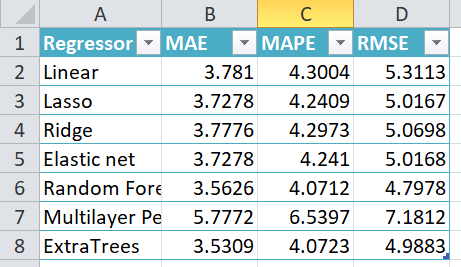

### Classification Results evaluation

After we address the data imbalance issue using UnderSample (2 method types) and SMOTE, we ran several classier methods to obtain the best accuracy.  

Next we are plotting out the accuracy of each class, confusion matrix and ROCs for a quick visual comparison.

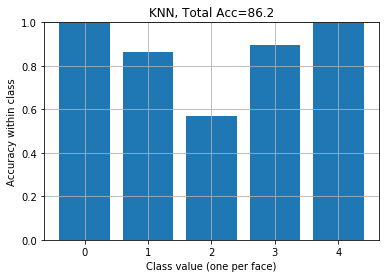

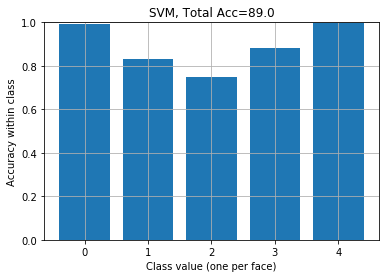

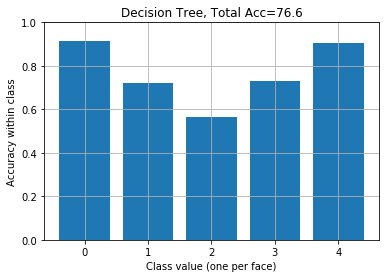

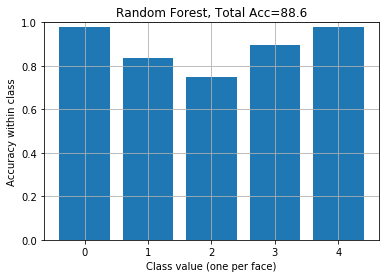

In [69]:
plot_class_acc(y_test,pred_knn,title="KNN")
plot_class_acc(y_test,pred_svm,title="SVM")
plot_class_acc(y_test,pred_tree,title="Decision Tree")
plot_class_acc(y_test,pred_rf,title="Random Forest")

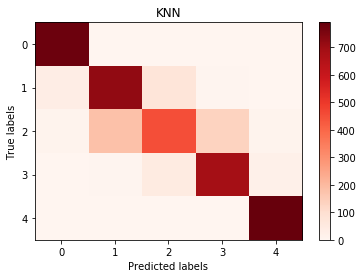

In [39]:
from sklearn import metrics as mt

ax= plt.subplot()

cm = mt.confusion_matrix(y_test,pred_knn)
plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto')
plt.title("KNN")
plt.colorbar()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

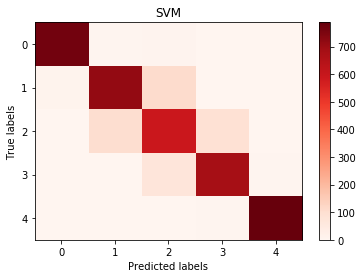

In [42]:
ax= plt.subplot()

cm = mt.confusion_matrix(y_test,pred_svm)
plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto')
plt.title("SVM")
plt.colorbar()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

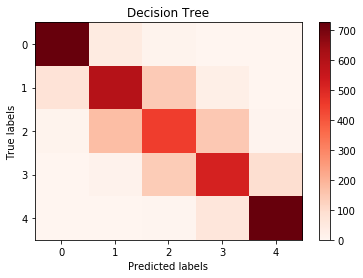

In [43]:
ax= plt.subplot()

cm = mt.confusion_matrix(y_test,pred_tree)
plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto')
plt.title("Decision Tree")
plt.colorbar()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

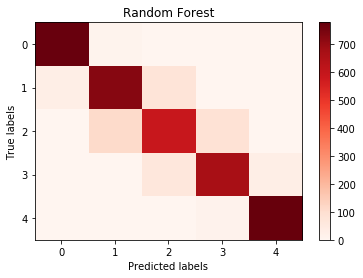

In [45]:
ax= plt.subplot()

cm = mt.confusion_matrix(y_test,pred_rf)
plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto')
plt.title("Random Forest")
plt.colorbar()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

In [182]:
y_test_org = y_test
y_test= np.select(
    [
        y_test == 'A', 
        y_test == 'B',
        y_test == 'C',
        y_test == 'D',
        y_test == 'F',
    ], 
    [
        '0', 
        '1',
        '2',
        '3',
        '4',
    ],
    default='NA'
)

y = y_test.astype(int)

In [183]:
# Probability Matrix
yhat_score_rf = rf_mod.predict_proba(X_test_scaled)
yhat_score_rf

array([[4.28571429e-03, 2.07857143e-01, 5.14880952e-01, 2.54166667e-01,
        1.88095238e-02],
       [1.13095238e-02, 9.27500000e-01, 6.04761905e-02, 7.14285714e-04,
        0.00000000e+00],
       [7.14285714e-04, 5.35714286e-03, 4.04761905e-02, 2.86547619e-01,
        6.66904762e-01],
       ...,
       [7.14285714e-04, 2.11904762e-02, 1.08928571e-01, 8.49761905e-01,
        1.94047619e-02],
       [0.00000000e+00, 0.00000000e+00, 1.90476190e-03, 6.00000000e-02,
        9.38095238e-01],
       [8.26190476e-02, 2.17857143e-01, 5.16309524e-01, 1.79166667e-01,
        4.04761905e-03]])

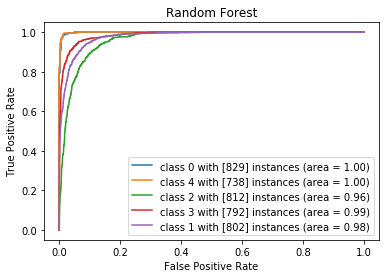

In [187]:
PlotROC_eachClass(yhat_score_rf,title='Random Forest')

In [189]:
#from sklearn.preprocessing import label_binarize
one_hot_class_encoding = label_binarize(y,np.unique(y))
one_hot_class_encoding

array([[0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0]])

0.9886907149308677

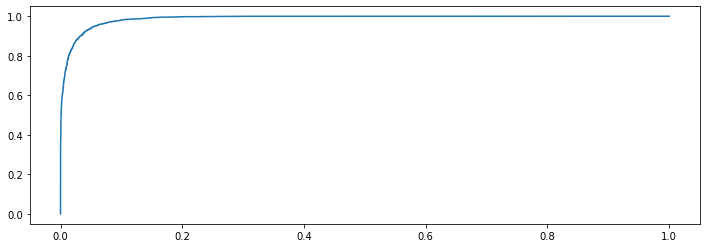

In [190]:
PlotROC_All(yhat_score_rf)

In [191]:
yhat_score_knn = knn_mod.predict_proba(X_test_scaled)
yhat_score_knn

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.]])

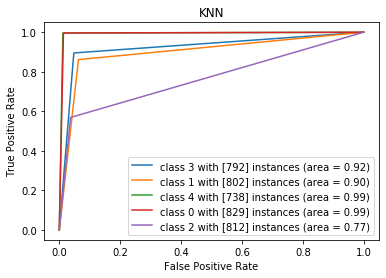

In [192]:
PlotROC_eachClass(yhat_score_knn,title='KNN')

0.913478479738233

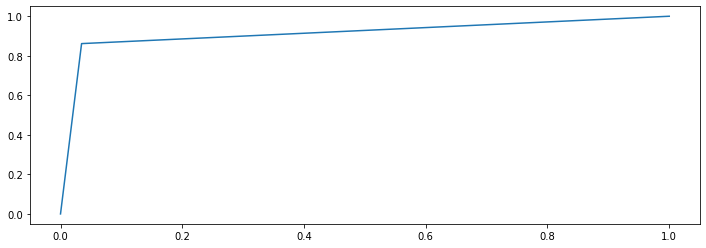

In [193]:
PlotROC_All(yhat_score_knn)

In [201]:
# Probability Matrix
yhat_score_lr = mod_logReg.predict_proba(X_test_scaled)
yhat_score_lr

array([[1.35830328e-05, 1.94980149e-01, 6.43752768e-01, 1.60645154e-01,
        6.08346458e-04],
       [1.08671732e-01, 7.78942291e-01, 1.08734033e-01, 3.65126899e-03,
        6.74886530e-07],
       [3.18972421e-11, 1.60361522e-05, 4.06058251e-03, 1.47108247e-01,
        8.48815134e-01],
       ...,
       [1.71727287e-05, 5.93051674e-02, 4.34457444e-01, 4.72845437e-01,
        3.33747785e-02],
       [1.24901614e-10, 3.91674743e-06, 2.59288053e-03, 8.61953624e-02,
        9.11207840e-01],
       [8.92686018e-02, 3.15508818e-01, 5.13370484e-01, 8.17658189e-02,
        8.62777562e-05]])

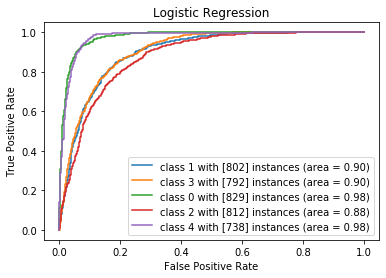

In [202]:
PlotROC_eachClass(yhat_score_lr,title='Logistic Regression')

0.9350024951331125

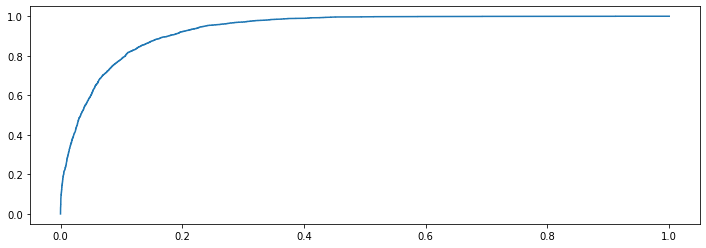

In [203]:
PlotROC_All(yhat_score_lr)

In [205]:
#Separate ROC curves for different classifiers
fpr_rf, tpr_rf, _ = mt.roc_curve(one_hot_class_encoding.ravel(), yhat_score_rf.ravel())
roc_auc_rf = mt.auc(fpr_rf, tpr_rf)

In [211]:
fpr_knn, tpr_knn, _ = mt.roc_curve(one_hot_class_encoding.ravel(), yhat_score_knn.ravel())
roc_auc_knn = mt.auc(fpr_knn, tpr_knn)

In [210]:
fpr_lr, tpr_lr, _ = mt.roc_curve(one_hot_class_encoding.ravel(), yhat_score_lr.ravel())
roc_auc_lr = mt.auc(fpr_lr, tpr_lr)

<Figure size 1152x648 with 0 Axes>

(0.0, 1.0)

(0.0, 1.05)

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver operating characteristic for cardio = 0')

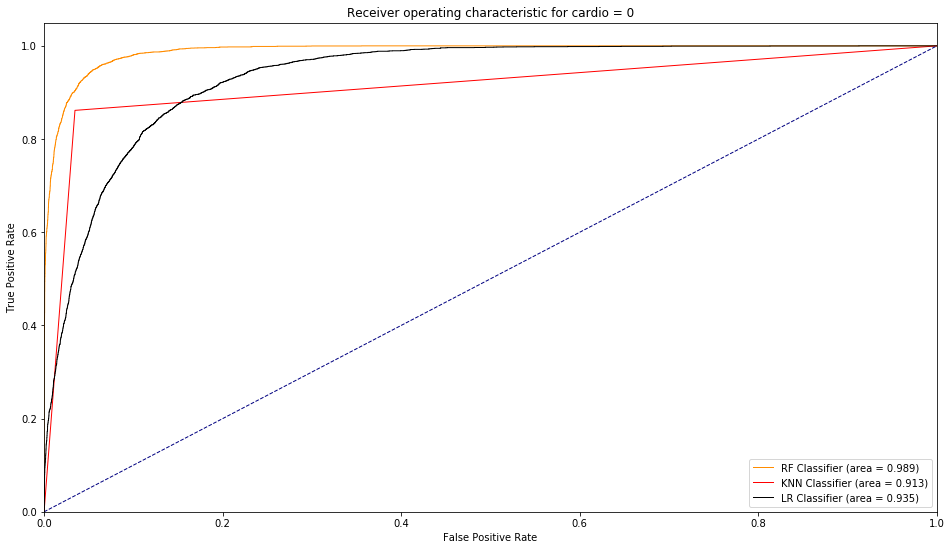

In [213]:
plt.figure(figsize=(16,9));
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=1, label='RF Classifier (area = %0.3f)' % roc_auc_rf)
plt.plot(fpr_knn, tpr_knn, color='red', lw=1, label='KNN Classifier (area = %0.3f)' % roc_auc_knn)
plt.plot(fpr_lr, tpr_lr, color='black', lw=1, label='LR Classifier (area = %0.3f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for cardio = 0')
plt.legend(loc="lower right")
plt.show()

From the above comparisons we observed:
- All classes (total 5) have high accuracies in general. Common highest accuracies for class A and F, lowest accuracy for class C.
- Confusion matrix shows similiar observation, Random Forest and SVM show better accuracies.
- ROC curves are plotted for each class for algorithms Random Forest, KNN and Logistic regression. Class C (class 2 in plot) shows smallest region compared to other classes, which is consistent with accuracy conclusion.
- ROC curve comparison among algorithms above shows that Random Forest has a much larger area above linear line compared to other two classifiers. SVM ROC would like similiar. 

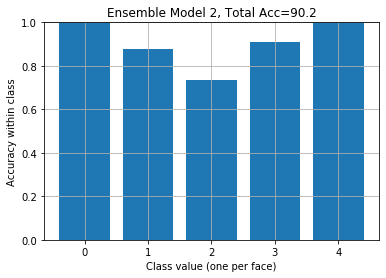

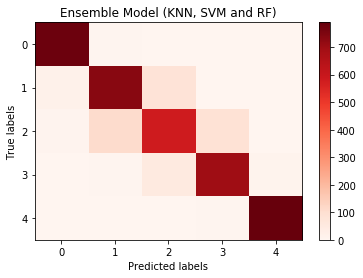

In [48]:
plot_class_acc(y_test,pred_voting_hard_2,title="Ensemble Model 2")

ax= plt.subplot()
cm = mt.confusion_matrix(y_test,pred_voting_hard_2)
plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto',)
plt.title("Ensemble Model (KNN, SVM and RF)")
plt.colorbar()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

Ensemble models with voting "hard" does not have probability property. However, the accuracy and confusion matrix above appear to be good and similiar with the previous results from random forest and SVM.

In next session we will talk about the summary table below.

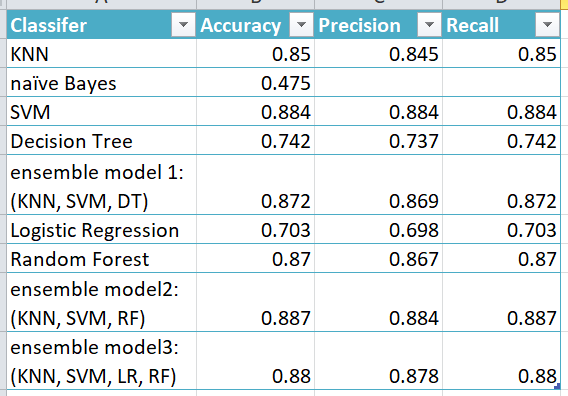

### Model and Evaluation 5 <a name="model-evaluation-5"></a>

#### A. Regression Model

<img align="center" src="https://github.com/fredpoon/ds_7331_jyrf_eda/blob/master/comparison.png?raw=true" alt="Comparison" />

- Linear

The strengths of linear regression are (1) the simple and more interpretable model (2) feature importance and the direction of the impact can be easily observed (3) it's usually very efficient. However linear regression has higher requirements for the input data. The data need to be normally distributed and it cannot model relationships that are not linear. 


- Lasso

Lasso regression is a special type of linear regression that allow shrinkage. When the data is used on sparse matrix, shrinkage can allow data values to shrunk towards a central point.  The procedure can make the process more efficient especially when there are a large number of parameters. 

- Ridge

Ridge regression is similiar to lasso, the only difference is ridge use “squared magnitude” of coefficient as penalty term while lasso use the absolute value. Ridge is also efficient especially when there are a large number of parameters. In our results, you can observe that Lasso and Ridge get similiar errors which are better than linear regression results.

- Elastic net

The elastic net regressor is a regularized regression method that combines L1 and L2 penalty terms linearly. It is a combined method of lasso and ridge methods above. From results you can see the error terms are similiar with lasso. It runs fast too.

- Random forest

The advantages of Random forest are that it reduces overfitting by averaging multiple trees. It in general reduces variance from outliers. The accuracy of it is good due to its unbiased nature and the capability of generalization. It also provides effectiveness to estimate the missing data. The drawback is the long running time.

- Multilayer Perceptron

Multilayer perceptron regressor is a type of Deep neural network that has several layers of input nodes connected inputs and outputs. Neural networks usually has the ability to learn and model non-linear and complex relationships. But it runs a long time. In our case this method doesn't give a good result. 

- ExtraTrees

Extra trees is very similiar to random forest, in the way that it also build multiple trees and split randomly. However it differ itself from random tree by not replace its samples by bootstrap but does not do replacements. Its randomness comes from random splits, not like random forest which does best splits. It is also a time-consuming regressor. But its results are comparable to random forest.


- Model Comparisons

As stated above, we will be comparing our models based on the 3 error measurements: MAE, MAPE and RMSE. Extra Trees  yielded the lowest MAE of 3.56 and Random Forest Regression yielded to the lowest MAPE and RMSE.  Both models are reasonable choices.

So our final winner is the Extra Trees which has the best MAE than all other regressors in use. We are using the Extra Trees model for our feature importance calculation.

#### B. Classification Model

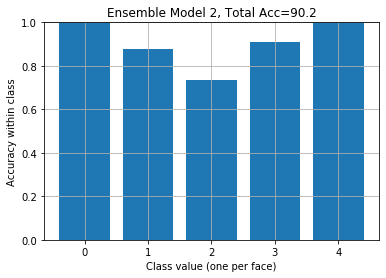

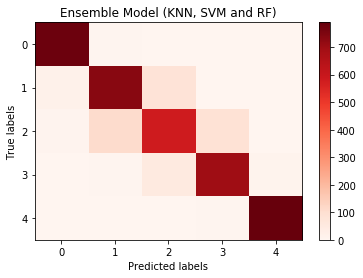

In [49]:
plot_class_acc(y_test,pred_voting_hard_2,title="Ensemble Model 2")

ax= plt.subplot()
cm = mt.confusion_matrix(y_test,pred_voting_hard_2)
plt.imshow(cm,cmap=plt.get_cmap('Reds'),aspect='auto',)
plt.title("Ensemble Model (KNN, SVM and RF)")
plt.colorbar()
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 

Using ROC Curves to find the best fit, we see Ensemble models provided the best fit with 

- K Nearest Neighbors

K nearest neighbors classifier build a tree which has a rule set up based on the demensions of its k nearest neighbors and leading to each leaf to represent a class. The advantages of KNN is usually its simplility and converges to the correct decison surface even when data is large. In our case we are using KD tree which can be used for multiclass data. 

- SVM

Support Vector Classifier works especially well with the datasets with a clear margin of seperations and works well in high dimensional spaces. It is causing long time to run. 

- Naive Bayes

Naive Bayes classifier is simple concept of counting up probabilities. it works well especially when the training sets are small. Its high bias and low variance make it less likely to overfit the traning data. However it may not get a high accurate model when the dataset is large. There are also assumptions for the data, e.g., Gaussian NB request the data to be approximately gaussian distribution. 

- Logistic Regression

Logistic regression classifier is easy to implement, interpret and very time efficient to train. Its results are highly interpretable and give direction of association. However it usually can not give the most accurate model because of its linear assumptions. It also have higher requirements for the input data.

- Random Forest

Random forest classifier is an algorithm that used ensembles of decision trees. The sampling is using bootstrapping and the results are weighted. Using it can usually avoid overfitting of the training set. 


- Decision Tree

Decision tree classifier consider all possible outcomes of a decision and can trace along each path to a conclusion. The results can be easily understood and the decision process can be easily plotted out. But it is generally unstable and a small data change may lead to a large change in tree structure. The accuracy of it is not compariable to random forest. 

- Model Comparisons

With SMOTE data, we compare our models based on the accuracy, precision and recall. From the table we can see naive bayes has an accuracy that apparantly lower than all other classifiers. Logistic regression and Decision trees both have good accuracy, precision and recall, but not compariable to the other classifiers. Both SVM and Random Forest get high accuracy, precision and recall values. Compared the two, all the measurements in SVM are higher than Random Forest, especially precision.

Next, we can take a look at the ensemble models. The 3 ensemble models all have very high accuracy, precision and recall values. Among the three, the best ensemble model is using the algorithms KNN, SVM and RF together. It gets an accuracy of 0.887, a precision of 0.884 and a recall of 0.887.

So our final winner is the second ensemble model (with KNN, SVM and RF) which is significantly better in accuracy, precision and recall than single classifier. The best single classifer is SVM. 

### Model and Evaluation 6 <a name="model-evaluation-6"></a>

#### Feature importance for regression model
Feature importance is a method in which an algorithm is used to weight dependent variables to show the degree at which they positively or negatively affect the response variable. The output can be represented in integers as well as graphically. There will be instances where some attributes have little to affect at all and conversely some attributes will carry much more weight than others.  
Using the scaled data, weights are added to identify the top 75 variables of importance to Graduation Rates. The generated output indicates that ACT testing and SPG are most strong indicators of graduation rates.

Top 5:
- SPG Score
- SPG Grade_B
- ACTWokKeys_SilverPlus_EDS
- English II Score
- EOCSubjects_CACR_All

Bottom 5:  
Here are some of attributes that had the least amount of importance within our regression model.
- MinorityFemalePct
- lea_sat_avg_score_num
- ACT WorkKeys Score
- nbpts_num
- ACTMath_ACTBenchmark_All

In [50]:
%%time
from sklearn.ensemble import ExtraTreesRegressor
#Create a regression estimator with best parameters for cross validation
regEstimator = ExtraTreesRegressor(bootstrap=False, criterion='mae', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=10, min_samples_split=4,
          min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=8,
          oob_score=False, random_state=0, verbose=0, warm_start=False)

#Fit the model using all of the scaled training data
regEstimator.fit(X_predGradRate_scal, Y_GradRate)

Wall time: 7min 14s


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=10,
                    min_samples_split=4, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=8, oob_score=False, random_state=0,
                    verbose=0, warm_start=False)

In [51]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
weights = regEstimator.feature_importances_.ravel()
feature_names = X_predGradRate_pick.columns.values
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

ExtraTreesRegressor(criterion='mae', min_samples_leaf=10, n_estimators=500,
                    n_jobs=8, random_state=0)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mae',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=10,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=500, n_jobs=8, oob_score=False, random_state=0,
                    verbose=0, warm_start=False)

Text(0.5, 1.0, 'Top Feature Correlations')

Text(0, 0.5, 'Coefficient Magnitude\n(z-score)')

Text(0.5, 0, 'Feature Names')

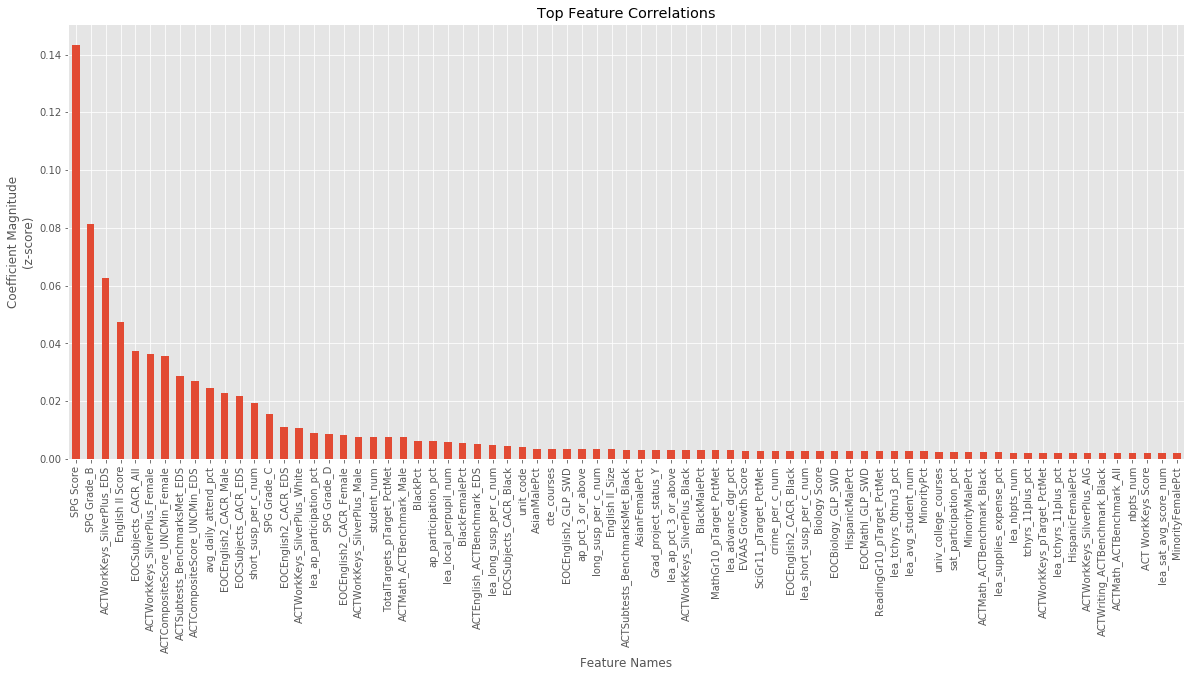

In [171]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = linreg_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

#### Feature importance for classification model

In [47]:
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train) # find scalings for each column that make this zero mean and unit std

X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test) # apply those means and std to the test set (without snooping at the test set values)

# train the model just as before
model2 = LogisticRegression(C=100, penalty='l1', solver='liblinear')
model2.fit(X_train_scaled, y_train)
pred = model2.predict(X_test_scaled)

acc = mt.accuracy_score(y_test,pred)
conf = mt.confusion_matrix(y_test,pred)
print('accuracy:', acc )
print(conf )

weights = model2.coef_.T # take transpose to make a column vector
variable_names = schoolData_pick_new.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])

StandardScaler(copy=True, with_mean=True, with_std=True)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy: 0.6589478983136169
[[668 104  11   5   0]
 [129 435 189  23   0]
 [ 19 193 402 184  22]
 [  2  19 171 418 184]
 [  0   1   6  93 695]]
TotalTargets_pTarget_PctMet has weight of 1.2609978455676363
MinorityMalePct has weight of -1.645724834627868
MinorityFemalePct has weight of 0.9094789951013704
short_susp_per_c_num has weight of -3.4970099072323
avg_daily_attend_pct has weight of 0.8145213139040627
title1_type_cd_Y has weight of -0.6797807409112365
BlackMalePct has weight of -0.6158699410642828
AsianFemalePct has weight of 0.25043275543010163
BlackFemalePct has weight of -0.5188850491038133
HispanicMalePct has weight of -1.3576229568951577
MathGr3-8_pTarget_PctMet has weight of 0.29804255403138796
AsianMalePct has weight of 0.46158223642224366
SciGr5&8_pTarget_PctMet has weight of -0.9196166089946315
nbpts_num has weight of 0.11478341754877666
lea_sat_avg_score_num has weight of 0.3647218472703562
stud_internet_comp_num has weight of -0.11305325251234172
st_avg_student_num ha

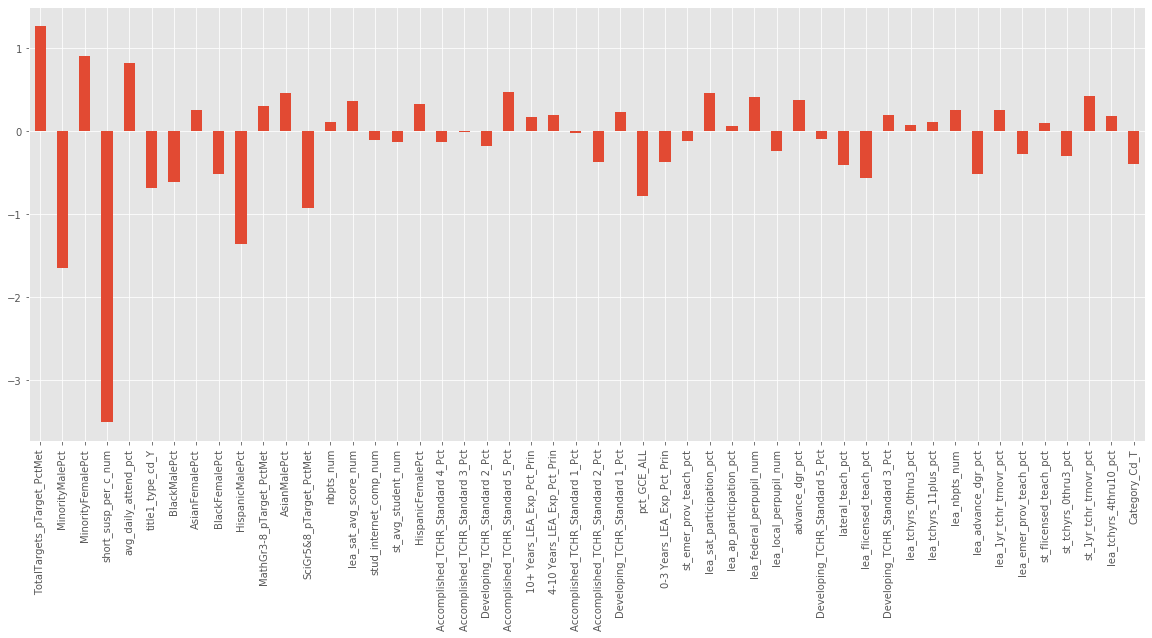

In [48]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

weights = pd.Series(model2.coef_[0],index=schoolData_pick_new.columns)
weights.plot(kind='bar',figsize=(20,8))
plt.show()

The weights in Logistic Regressions makes the model more interpretable. To make the weights of all features comparable, we have to normalize the attributes to the same scales. 

From the plot above we can recognize some important features:
- short_susp_per_c_num
- MinorityMalePct
- HispanicMalePct
- TotalTargets_pTarget_PctMet
- SciGr5&8_pTarget_PctMet

Bottom 5:  
Here are some of attributes that had the least amount of importance within our classification model.
- Category_Cd_T
- lea_tchyrs_4thru10_pct
- st_1yr_tchr_tmovr_pct
- st_tchyrs_othru3_pct
- st_flicensed_teach_pct

The polarities (positive or negative values) state whether there was a positive or negative impact to the categorical attribute, SPG Grade.

In [49]:
%%time
#Use the linear kernel to get the set of coefficients for SVM
svm = SVC(kernel='linear') 
svm.fit(Xs2_train_scaled, y_train) 
y_hat = svm.predict(Xs2_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
print('accuracy:', acc ) #Check the accuracy to make sure the model is still good
svm.coef_.shape

accuracy: 0.704757110495847
Wall time: 51 s


(10, 50)

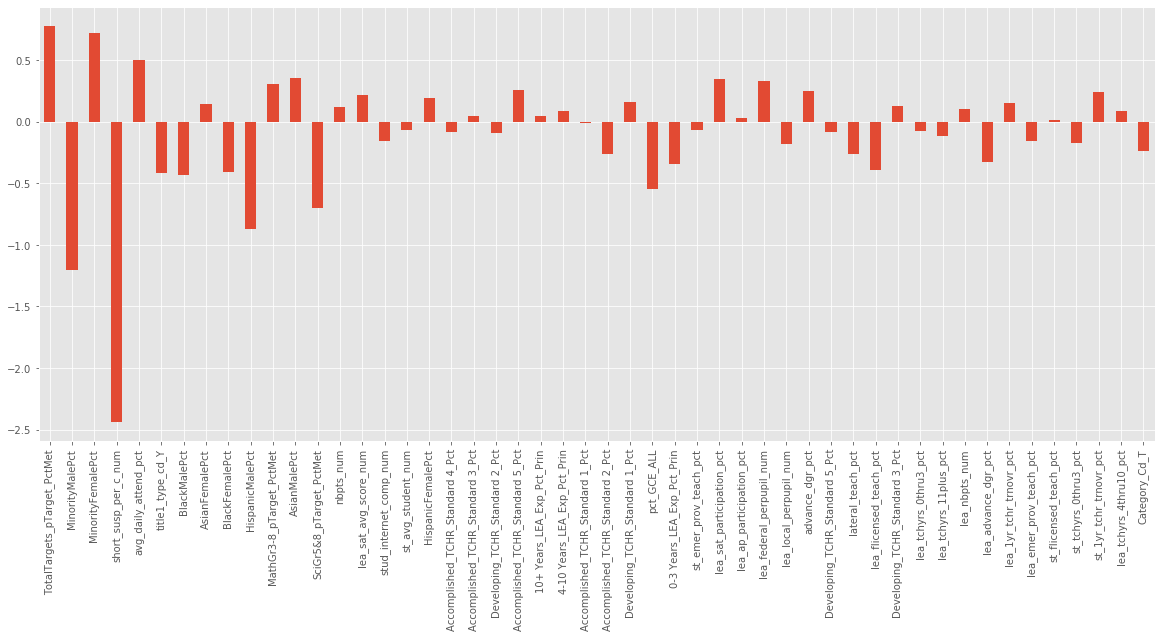

In [50]:
#Plot out the weights from the svm_coef for feature importance interpretation.
weights = pd.Series(svm.coef_[0],index=schoolData_pick_new.columns)
weights.plot(kind='bar',figsize=(20,8))
plt.show()

Unlike Logistic regression, SVM do not have a direct model weight but if we use linear kernel for SVM, it's possible that we get a hyperplane that separate the classes as best as possible.

Just for interpretation purpose, we can use the coefficients from the svm which represent the hyperplane. It gives you the coordinates of a vector which is orthogonal to the hyperplane. Check the plot below for recoginizing the parameters with bigger weights.

From the plot above we can recognize some important features, for example:
- short_susp_per_c_num
- BlackMalePct
- HispanicMalePct
- pct_GCE_ALL
- lea_flicensed_teach_pct

Bottom 5:  
Here are some of attributes that had the least amount of importance within our classification model. 
- Category_Cd_T
- lea_tchyrs_4thru10_pct
- st_1yr_tchr_tmovr_pct
- st_tchyrs_othru3_pct
- st_flicensed_teach_pct

The polarities (positive or negative values) state whether there was a positive or negative impact to the categorical attribute, SPG Grade.

For example, the coefficient of short_susp_per_c_num is negative, which means it is negatively correlated with SPG Grade -- The higher the suspension rate, the lower the SPG Grade is. Similiar concepts are applied to other variables.

From the two methodologies, we recognize and consider the short_sups_per_c_num is the most important feature. Along this thought, we see that there are similarities between the two classification models and the attribute weights.

## Deployment <a name="deployment"></a>
Our model is useful for school districts that are evaluating and measuring schools in their respective areas. It should be important to the district's representatives to understand the statistics behind the scores of these schools, what drives the schools and where to make policy changes. The model can also be an important factor in real estate. Homebuyers with children may consider a school’s “health” as a factor on purchasing a home in a particular area or school district.

The model's effectiveness can be measured by possibly being used in new and existing neighborhoods, parks and recreation, and commercial zoning to assist in economic development.

District leadership can present to city councils, PTA (Parent Teacher Association) and other organizations the model with proven accuracy the indicators to focus on or where improvements can be made.  

As new neighborhoods are being built, schools also are built to support the enrollment need. School zones and boundaries will change and it is suggested that the model is evaluated annually and modified on an as needed basis. We can make improvements to ensure the model remains effective going forward.

## Exceptional Work <a name="exceptional-work"></a>
For exceptional work, we used 6 algorithms for classification and 7 algorithms for regression. We used GridSearchCV to tune our parameters in both classification and regression models. In the code chunks above, you may find that we also used RandomizedSearchCV as well. This was used to quickly find the right parameters when GridSearchCV took more than 30 minutes to run.

In data preparation, we used random forest to eliminate redundant attributes.

For classification, we also used ensemble as a classification model. The best ensemble model we saw that ensemble of KNN, SVM, and Random Forest created a strong high accurate model.